# 🎓 Maestría en Inteligencia Artificial Aplicada

<center>

![Tecnológico de Monterrey](https://img.shields.io/badge/Tecnológico%20de%20Monterrey-0055A2?style=for-the-badge&labelColor=0055A2&logoColor=white)
[![Curso](https://img.shields.io/badge/Curso-Operaciones%20de%20Aprendizaje%20Automático-FF6B6B?style=for-the-badge&logo=eye)](https://tec.mx)
[![Activity](https://img.shields.io/badge/Fase%201:Avance%20de%20Proyecto-Google%20Colab-F9AB00?style=for-the-badge&logo=googlecolab)](https://colab.research.google.com)

</center>

---

### **Proyecto:** Energy Efficiency

---

### **Profesor:** Dr. Gerardo Rodríguez Hernández

---
### **Equipo 38**
| Integrante | Matrícula | Rol |
|---|---|---|
| Jaime Alejandro Mendívil Altamirano| `A01253316` | SRE / DevOps |
| Christian Erick Mercado Flores | `A00841954` | Software Engineer  |
| Saul Mora Perea | `A01796295` | Data Engineer  |
| Juan Carlos Pérez Nava | `A01795941` | Data Scientist  |
| Mario Javier Soriano Aguilera | `A01384282` | ML Engineer  |

---

Fecha: 12 de Octubre de 2025

# Índice

#### 1. Importación de Librarías

#### 2. Configuración de DVC

#### 3. Análisis de Requerimientos

#### 4. Manipulación y Preparación de Datos (Aplicación de *EDA*)
	* 4.1. Estructura de los Datos
	* 4.2. Análisis Univariante
		* a) Limpieza Datos
		* b) Histogramas y Análisis de Distribución
		* c) Imputación de Datos Faltantes
		* d) Boxplots y Análisis de Límites
		* e) Imputación de Datos Atípicos
	* 4.3. Análisis Bivariante
		* a) Análisis de Correlación
		* b) Scatter Plots

#### 5. Exploración y Preprocesamiento de Datos (Aplicación de *Feature Engineering*)

#### 6. Construcción, Ajuste y Evaluación de Modelos de *Machine Learning*
	* 6.1. Random Forest Clasificador
	* 6.2 XGBoost

#### 7. Referencias

# 1. Importación de Librarías

In [1]:
# Instalar DVC con soporte gdrive
!pip install -q dvc[gdrive]

zsh:1: no matches found: dvc[gdrive]


In [2]:
# Librerías

# 1. Librerías Estándar de Python (Built-in)
import math
import os

# 2. Librerías de Terceros (Alfabético)
import gdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from IPython.display import display

# 3. Librerías Específicas del Proyecto / Scikit-learn (Alfabético)
#    (Se agrupan a menudo para mantener la limpieza)
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             mean_squared_error, r2_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, PowerTransformer

# 2. Configuración de DVC

In [3]:
# Bloque para cambiar el directorio de trabajo al nivel superior y mostrar el nuevo path

# 1) Cambiar al directorio padre
os.chdir('..')

# 2) Mostrar el directorio actual para confirmar el cambio
print(f"Directorio de trabajo actual: {os.getcwd()}")

Directorio de trabajo actual: /Users/cremercado/Desktop/MLops_E38


In [4]:
# Bloque de inicialización y configuración de DVC con almacenamiento remoto en Google Drive

# 1) Inicializar un nuevo repositorio DVC en el proyecto actual
!dvc init

# 2) Agregar un remote tipo Google Drive como destino principal de datos
!dvc remote add -d datos gdrive://1VnjNYOpP2uSaaUtFdRzW45iwZJUbt-5v

# 3) Configurar el acceso al remote con credenciales de cliente OAuth
!dvc remote modify datos gdrive_client_id '426582966437-3ni4029llgejof826h2pktmkk4elcm6j.apps.googleusercontent.com'
!dvc remote modify datos gdrive_client_secret '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'

# 4) Verificar la lista de remotes configurados
!dvc remote list

# 5) Agregar todos los archivos modificados o creados al área de preparación de Git
!git add .

# 6) Crear un commit con un mensaje descriptivo
!git commit -m "Init DVC"

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>
Setting 'datos' as a default remote.
datos   gdrive://1VnjNYOpP2uSaaUtFdRzW45iwZJUbt-5v      (default)
[main b8986ec] Init DVC
 Committer: Christian E. Mercado <cremercado@MacBook-Pro-2.local>
Your name and email address were configured aut

In [5]:
def save_and_version(df, filename, commit_msg, remote='datos'):
    """
    Guarda un DataFrame como archivo CSV, lo versiona con DVC y sincroniza los cambios 
    con el repositorio remoto de Git y el almacenamiento remoto configurado.

    Parámetros:
        df (pd.DataFrame)  : DataFrame que se desea guardar y versionar.
        filename (str)     : Nombre del archivo CSV a generar dentro del directorio Dataset.
        commit_msg (str)   : Mensaje del commit que se realizará en Git.
        remote (str)       : Nombre del almacenamiento remoto configurado en DVC (por defecto 'datos').

    Retorno:
        None : La función no retorna ningún valor, solo ejecuta acciones de guardado,
               versionamiento y subida remota.
    """

    # 1) Creación de directorio y guardado del archivo CSV
    os.makedirs("Dataset", exist_ok=True)       # Crea el directorio Dataset si no existe
    path = os.path.join("Dataset", filename)    # Construye la ruta completa del archivo
    df.to_csv(path, index=False)                # Guarda el DataFrame en formato CSV sin índice
    print(f"Saved CSV: {path}")                 # Confirma en consola la ubicación del archivo guardado

    # 2) Agregar el archivo al control de versiones de DVC
    !dvc add "{path}"                           # Añade el archivo al seguimiento de DVC

    # 3) Preparar y confirmar los cambios en Git
    dvc_file = path + ".dvc"                    # Determina la ruta del archivo de metadatos .dvc
    !git add "{dvc_file}" "Dataset/.gitignore"  # Agrega los archivos de DVC y .gitignore al staging de Git
    !git commit -m "{commit_msg}"               # Realiza el commit con el mensaje proporcionado

    # 4) Subir los datos al almacenamiento remoto y sincronizar con el repositorio Git
    !dvc push -r {remote}                       # Envía los datos versionados al remoto de DVC
    !git push origin main                       # Empuja los cambios del repositorio a la rama principal

    # 5) Confirmación final
    print("Dataset versioned with DVC and pushed!")

# 3. Análisis de Requerimientos

**Características del dataset**

Esta información proviene de un estudio que evaluó los requisitos de carga térmica para calefacción y refrigeración en edificios, es decir, su eficiencia energética, en función de diversos parámetros arquitectónicos.
El conjunto de datos, disponible en la siguiente liga, fue generado a partir de un análisis energético que consideró 12 configuraciones distintas de edificios, simuladas mediante el software Ecotect.
Las edificaciones varían en aspectos como el área de acristalamiento, la distribución de dicha área y la orientación, entre otros parámetros relevantes.

El conjunto de datos se describe en el texto académico llamado *Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools* (Tsanasa & Xifarab, 2012).

Estos datos provienen de simulaciones de edificios residenciales realizadas con software especializado llamado **Ecotect**. Se diseñaron distintas formas de construcción manteniendo el mismo volumen, pero variando superficies, orientaciones y proporción de ventanas. También se consideraron diferentes materiales y condiciones internas típicas de uso residencial.

El Dataset original contiene **768** configuraciones de edificios, cada una caracterizada por variables como la compacidad (**X1**), el área de superficie (**X2**), pared (**X3**), techos (**X4**), altura total (**X5**), orientación (**X6**), área de acristalamiento (**X7**) y distribución de área de acristalamiento (**X8**). Para cada caso se calcularon dos resultados principales: la carga de calefacción (**Heating Load** o **HL**, representada como **Y1**) y la carga de enfriamiento (**Cooling Load** o **CL**, representada como **Y2**), que sirven como referencia para evaluar el desempeño energético.


Liga de la información del dataset [Rendimiento energético](https://archive.ics.uci.edu/dataset/242/energy+efficiency)



<table border="1">
  <thead>
    <tr>
      <th>Nombre de la variable</th>
      <th>Rol</th>
      <th>Tipo</th>
      <th>Descripción</th>
      <th>Unidades</th>
      <th>Valores faltantes</th>
      <th>Valores Únicos (Dataset original)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>X1</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Compacidad relativa</td>
      <td></td>
      <td>No</td>
      <td>12</td>
    </tr>
    <tr>
      <td>X2</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área de superficie</td>
      <td></td>
      <td>No</td>
      <td>12</td>
    </tr>
    <tr>
      <td>X3</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área de pared</td>
      <td></td>
      <td>No</td>
      <td>7</td>
    </tr>
    <tr>
      <td>X4</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área del techo</td>
      <td></td>
      <td>No</td>
      <td>4</td>
    </tr>
    <tr>
      <td>X5</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Altura total</td>
      <td></td>
      <td>No</td>
      <td>2</td>
    </tr>
    <tr>
      <td>X6</td>
      <td>Característica</td>
      <td>Entero</td>
      <td>Orientación</td>
      <td></td>
      <td>No</td>
      <td>4</td>
    </tr>
    <tr>
      <td>X7</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área de acristalamiento</td>
      <td></td>
      <td>No</td>
      <td>4</td>
    </tr>
    <tr>
      <td>X8</td>
      <td>Característica</td>
      <td>Entero</td>
      <td>Distribución del área de acristalamiento</td>
      <td></td>
      <td>No</td>
      <td>6</td>
    </tr>
    <tr>
      <td>Y1</td>
      <td>Blanco</td>
      <td>Continuo</td>
      <td>Carga de calefacción</td>
      <td></td>
      <td>No</td>
      <td>586</td>
    </tr>
    <tr>
      <td>Y2</td>
      <td>Blanco</td>
      <td>Continuo</td>
      <td>Carga de enfriamiento</td>
      <td></td>
      <td>No</td>
      <td>636</td>
    </tr>
  </tbody>
</table>


In [6]:
# Descarga de los datasets originales y modificados desde Google Drive hacia el directorio temporal

# 1) Definición de los IDs de los datasets en Google Drive
id_dataset_original = '1Dkwu9-P7MhineLZZawDnmYMBSM2ap02b'
id_dataset_modified = '1OuJHPpn2Wv5EhlL1J98HWYyPJM-iL8Ds'

# 2) Definición de los nombres de los archivos CSV locales
energy_original = 'energy_original.cvs'
energy_modified = 'energy_modified.cvs'

# 3) Construcción de las rutas completas donde se guardarán los archivos descargados
ruta_original = os.path.join("/tmp", energy_original)
ruta_modified = os.path.join("/tmp", energy_modified)

# 4) Descarga de los archivos desde Google Drive usando sus IDs y guardado en las rutas especificadas
gdown.download(id=id_dataset_original, output=ruta_original, quiet=True)
gdown.download(id=id_dataset_modified, output=ruta_modified, quiet=True)

'/tmp/energy_modified.cvs'

In [7]:
# Lectura de los archivos CSV descargados y carga en DataFrames de pandas

# 1) Cargar el dataset original en un DataFrame
df_original = pd.read_csv(ruta_original, sep=',')

# 2) Cargar el dataset modificado en un DataFrame
df_modified = pd.read_csv(ruta_modified, sep=',')

In [8]:
# Visualización de la información general del DataFrame
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X1              776 non-null    object 
 1   X2              774 non-null    object 
 2   X3              776 non-null    object 
 3   X4              776 non-null    object 
 4   X5              767 non-null    object 
 5   X6              772 non-null    object 
 6   X7              771 non-null    object 
 7   X8              772 non-null    float64
 8   Y1              777 non-null    object 
 9   Y2              777 non-null    object 
 10  mixed_type_col  696 non-null    object 
dtypes: float64(1), object(10)
memory usage: 67.4+ KB


In [9]:
# Obtención de estadísticas descriptivas completas del DataFrame
df_modified.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,776,31,0.79,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,774,32,637.0,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,776,25,294.0,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,776,19,220.5,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,767,16,7.0,362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,772,20,4.0,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,771,16,0.4,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,772.0,NaN,NaN,NaN,5.200777,40.220112,0.0,1.0,3.0,4.0,971.0
Y1,777,596,15.16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,777,645,21.33,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Versionado de Datos
save_and_version(df_original, "energy_original.csv", "Add energy_original dataset")

Saved CSV: Dataset/energy_original.csv
 ⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/cremercado/Desktop/MLops_E38/.dvc/cache/files/md5
                                                                                
!
  0%|          |Adding Dataset/energy_original.csv to 0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/cremercado/Desktop0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 43.72file/s]

To track the changes with git, run:

	git add Dataset/energy_original.csv.dvc Dataset/.gitignore

To enable auto staging, run:

	dvc config core.autostage true
[main b9f2424] Add energy_original dataset
 Committer: Christian E. Mercado <cremercado@MacBook-Pro-2.local>
Your name and ema

In [11]:
# Versionado de Datos
save_and_version(df_modified, "energy_modified.csv", "Add energy_modified dataset")

Saved CSV: Dataset/energy_modified.csv
 ⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/cremercado/Desktop/MLops_E38/.dvc/cache/files/md5
                                                                                
!
  0%|          |Adding Dataset/energy_modified.csv to 0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/cremercado/Desktop0/1 [00:00<?,    ?files/s]
100% Adding...|███████████████████████████████████████|1/1 [00:00, 111.95file/s]

To track the changes with git, run:

	git add Dataset/.gitignore Dataset/energy_modified.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
[main 5e7e2ad] Add energy_modified dataset
 Committer: Christian E. Mercado <cremercado@MacBook-Pro-2.local>
Your name and ema

# 4. Manipulación y Preparación de Datos (Aplicación de *EDA*)

## 4.1. Estructura de los Datos

In [12]:
def show_stats(df):
    """
    Muestra un análisis general del DataFrame, incluyendo forma, resumen por columna y estadísticas descriptivas.

    Parámetros:
        df (pd.DataFrame) : DataFrame a analizar y mostrar información estadística.

    Retorno:
        None : La función no retorna valores, solo imprime y muestra información del DataFrame.
    """

    # 1) Mostrar la forma del DataFrame
    print("\n\n=== Forma del DataFrame ===")                    # Encabezado de sección
    print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")  # Número de filas y columnas del DataFrame

    # 2) Generar resumen por columna
    summary = pd.DataFrame({
        "dtype": df.dtypes,                                     # Tipo de dato de cada columna
        "Valores Únicos": df.nunique(),                         # Número de valores únicos por columna
        "Nulos": df.isna().sum(),                               # Conteo de valores nulos por columna
        "% Nulos": (df.isna().mean() * 100).round(2)            # Porcentaje de valores nulos por columna
    })

    # 3) Mostrar resumen por columna ordenado por porcentaje de nulos
    print("\n\n=== Resumen por Columna ===")                    # Encabezado de sección
    display(summary.sort_values(by="% Nulos", ascending=False)) # Muestra el resumen ordenado por % de nulos

    # 4) Mostrar estadísticas descriptivas completas del DataFrame
    print("\n\n=== Estadísticas Descriptivas ===")              # Encabezado de sección
    display(df.describe(include="all").T)                       # Estadísticas descriptivas transpuestas

In [13]:
# Análisis completo del DataFrame

# 1) Mostrar encabezado del análisis
print("********* Análisis de la Estructura de Datos *********")

# 2) Ejecutar función de estadística y resumen
show_stats(df_modified)

********* Análisis de la Estructura de Datos *********


=== Forma del DataFrame ===
Filas: 783  |  Columnas: 11


=== Resumen por Columna ===


,dtype,Valores Únicos,Nulos,% Nulos
mixed_type_col,object,423,87,11.11
X5,object,16,16,2.04
X7,object,16,12,1.53
X6,object,20,11,1.40
X8,float64,10,11,1.40
X2,object,32,9,1.15
X1,object,31,7,0.89
X3,object,25,7,0.89
X4,object,19,7,0.89
Y1,object,596,6,0.77




=== Estadísticas Descriptivas ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,776,31,0.79,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,774,32,637.0,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,776,25,294.0,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,776,19,220.5,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,767,16,7.0,362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,772,20,4.0,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,771,16,0.4,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,772.0,NaN,NaN,NaN,5.200777,40.220112,0.0,1.0,3.0,4.0,971.0
Y1,777,596,15.16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,777,645,21.33,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Visualización de las primeras filas del DataFrame
df_modified.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,mixed_type_col
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,637
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,618
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,412
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,243
4,0.9,563.5,318.5,122.5,7.0,2.0,0.0,0.0,20.84,28.28,979


**Análisis de la estructura de los datos**

A partir de la exploración realizada, se identifican las siguientes observaciones.

1. **Dimensión del dataset**:
    - El conjunto de datos cuenta con **783** filas y **11** columnas.

2. **Valores faltantes**:
    - Todas las variables presentan valores nulos en diferente proporción (desde **~0.8%** hasta **~11.1%**).
    - La columna con mayor proporción de nulos es `mixed_type_col`.

3. **Tipos de datos**:
    - La mayoría de las columnas están almacenadas como `object`, pues muestran datos numéricos y cadenas de texto (como `"bad"` o `"error"`, que rompen el formato numérico esperado).
    - Aún así la gran mayoría de valores son **numéricos**. Por tanto, puede se mejor **convertir los tipos de datos** para hacer análisis numérico y que los modelos no tengan fricciones.

4. **Nomenclatura de las variables**:
    - Existe una convención clara en los nombres de las variables:
      * **Predictoras:** `X1` a `X8`.
      * **Posibles variables objetivo o etiquetas:** `Y1` y `Y2`.
      * **Excepción:** `mixed_type_col` que no sigue el mismo patrón y además presenta la mayor proporción de nulos.

5. **Columna problemática: `mixed_type_col`**:
    - Esta columna tiene la mayor cantidad de valores nulos y presenta mezcla de tipos (numéricos y cadenas de texto).
    - Deberá revisarse si conviene **limpiarla/transformarla** (ej. convertir `"bad"` en `NaN`) o **descartarla** si su calidad es muy baja.

## 2.2. Análisis Univariante

### a) Limpieza Datos

**Proceso de limpieza**

Después del análisis exploratorio inicial, se propone el siguiente procedimiento para garantizar que los datos sean consistentes y adecuados para el análisis univariante:

1. **Unificación de valores no válidos**
    - Se reemplazarán cadenas de texto no numéricas (ej. `"bad"`), celdas vacías o aquellas que contengan únicamente espacios en blanco por el valor estándar de **faltante** (`NaN`).
    - Esto asegura que todos los valores inconsistentes se traten de manera homogénea como datos faltantes.

2. **Conversión de tipos de datos**
    - Se intentará convertir todas las columnas al tipo **numérico** (`float`), ya que las observaciones son esencialmente valores continuos/discretos.
    - En caso de que existan valores que no puedan transformarse, estos también se marcarán como `NaN`.
    - Este paso garantiza que las variables puedan ser utilizadas directamente en análisis estadístico y modelos.

In [15]:
def clean_process(df):
    """
    Realiza una limpieza y conversión de un DataFrame, reemplazando valores vacíos por NaN 
    y convirtiendo todas las columnas a tipo numérico.

    Parámetros:
        df (pd.DataFrame) : DataFrame original a limpiar y convertir.

    Retorno:
        pd.DataFrame : DataFrame limpio con valores vacíos convertidos en NaN y todas las columnas en formato numérico.
    """

    # 1) Crear una copia del DataFrame original
    df_copy = df.copy()                                         # Evita modificar el DataFrame original

    # 2) Reemplazar celdas vacías o espacios en blanco por NaN
    df_copy.replace(r'^\s*$', np.nan, regex=True, inplace=True) # Detecta cadenas vacías o espacios y las convierte en NaN

    # 3) Convertir todas las columnas a tipo numérico
    df_clean = df_copy.apply(pd.to_numeric, errors='coerce')    # Convierte valores no numéricos a NaN

    # 4) Retornar el DataFrame limpio
    return df_clean                                             # Devuelve el DataFrame procesado y limpio

In [16]:
# Limpieza del DataFrame modificado y análisis posterior al proceso de limpieza

# 1) Aplicar la función de limpieza al DataFrame modificado
df_clean = clean_process(df_modified)

# 2) Mostrar encabezado del análisis post-limpieza
print("********* Análisis de Datos después del Proceso de Limpieza *********")

# 3) Ejecutar función de estadística y resumen sobre el DataFrame limpio
show_stats(df_clean)

********* Análisis de Datos después del Proceso de Limpieza *********


=== Forma del DataFrame ===
Filas: 783  |  Columnas: 11


=== Resumen por Columna ===


,dtype,Valores Únicos,Nulos,% Nulos
mixed_type_col,float64,421,232,29.63
X5,float64,12,19,2.43
X7,float64,11,14,1.79
X3,float64,16,13,1.66
X6,float64,14,13,1.66
X8,float64,10,11,1.40
X2,float64,19,10,1.28
X4,float64,13,10,1.28
X1,float64,18,9,1.15
Y2,float64,631,9,1.15




=== Estadísticas Descriptivas ===


,count,mean,std,min,25%,50%,75%,max
X1,774.0,2.547713,34.921767,0.62,0.6900,0.76,0.8600,902.62
X2,773.0,777.653946,1880.744457,514.50,612.5000,686.00,759.5000,46893.00
X3,770.0,372.516234,947.849297,245.00,294.0000,318.50,343.0000,24622.50
X4,773.0,228.403299,719.023316,110.25,147.0000,220.50,220.5000,15214.50
X5,764.0,12.270942,67.282920,3.50,3.5000,7.00,7.0000,955.50
X6,770.0,7.875325,44.929189,2.00,3.0000,4.00,5.0000,776.00
X7,769.0,2.138427,27.253953,0.00,0.1000,0.25,0.4000,516.00
X8,772.0,5.200777,40.220112,0.00,1.0000,3.00,4.0000,971.00
Y1,776.0,28.055188,75.956468,6.01,13.0075,19.27,32.1225,1676.70
Y2,774.0,39.055181,172.591567,10.90,15.7625,23.11,33.5075,3665.13


In [17]:
# Visualización de las primeras filas del DataFrame
df_clean.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,mixed_type_col
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,637.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,618.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,412.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,243.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,979.0


In [18]:
# Versionado de Datos
save_and_version(df_clean, "energy_modified_clean.csv", "Add energy_modified_clean dataset")

Saved CSV: Dataset/energy_modified_clean.csv
 ⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/cremercado/Desktop/MLops_E38/.dvc/cache/files/md5
                                                                                
!
  0%|          |Adding Dataset/energy_modified_clean.c0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/cremercado/Desktop0/1 [00:00<?,    ?files/s]
100% Adding...|███████████████████████████████████████|1/1 [00:00, 117.46file/s]

To track the changes with git, run:

	git add Dataset/.gitignore Dataset/energy_modified_clean.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
[main 78e326c] Add energy_modified_clean dataset
 Committer: Christian E. Mercado <cremercado@MacBook-Pro-2.local>

### b) Histogramas y Análisis de Distribución

In [19]:
def plot_histograms(df, cols=None, bins=20, figsize=(20, 10)):
    """
    Genera histogramas con curva KDE para las columnas numéricas de un DataFrame, incluyendo líneas de media y mediana, 
    y mostrando estadísticas resumidas dentro de cada gráfico.

    Parámetros:
        df (pd.DataFrame)  : DataFrame cuyos datos se van a graficar.
        cols (list, opc.)  : Lista de nombres de columnas a graficar. Si no se especifica, se seleccionan todas las columnas numéricas.
        bins (int)         : Número de bins para los histogramas.
        figsize (tuple)    : Tamaño de la figura para la visualización de todos los histogramas.

    Retorno:
        None : La función genera y muestra gráficos directamente, sin retornar valores.
    """

    # 1) Selección de columnas a graficar
    if cols is None:
        cols = df.select_dtypes(include='number').columns.tolist()          # Selecciona todas las columnas numéricas si no se especifica
    n_cols = len(cols)                                                      # Número total de columnas a graficar

    # 2) Determinar la disposición de subplots
    nrows = math.ceil(math.sqrt(n_cols))                                    # Calcula el número de filas aproximadas
    ncols = math.ceil(n_cols / nrows)                                       # Calcula el número de columnas en función de filas

    # 3) Crear figura y ejes para los subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)     # Genera la figura y los ejes
    axes = axes.flatten()                                                   # Aplana la matriz de ejes para iterar fácilmente

    # 4) Graficar cada columna
    for i, col in enumerate(cols):
        ax = axes[i]                                                        # Selecciona el eje correspondiente

        sns.histplot(data=df, x=col, bins=bins, kde=True,                   # Histograma con curva KDE
                     color='skyblue', edgecolor='black', ax=ax)

        # Calcular estadísticas básicas
        media = df[col].mean()                                              # Media de la columna
        mediana = df[col].median()                                          # Mediana de la columna
        desviacion = df[col].std()                                          # Desviación estándar de la columna

        # Dibujar líneas de media y mediana
        ax.axvline(media, color='red', linestyle='--', linewidth=1.5)       # Línea vertical de la media
        ax.axvline(mediana, color='green', linestyle='--', linewidth=1.5)   # Línea vertical de la mediana

        # Mostrar texto con estadísticas dentro del gráfico
        texto = (
            f"Media: {media:.2f}\n"
            f"Mediana: {mediana:.2f}\n"
            f"Desv. Std: {desviacion:.2f}"
        )
        ax.text(0.95, 0.95, texto,                                          # Ubica el texto en la esquina superior derecha
                transform=ax.transAxes, ha='right', va='top',
                fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))

        # Configurar títulos y etiquetas
        ax.set_title(f'Histograma + KDE de {col}')                          # Título del subplot
        ax.set_xlabel('Valor')                                              # Etiqueta del eje X
        ax.set_ylabel('Frecuencia / Densidad')                              # Etiqueta del eje Y
        ax.grid(True)                                                       # Activa la cuadrícula

    # 5) Desactivar ejes sobrantes si hay más subplots que columnas
    for j in range(n_cols, len(axes)):
        axes[j].axis('off')                                                 # Oculta los ejes sin datos

    # 6) Ajustar el layout y mostrar la figura
    plt.tight_layout()                                                      # Ajusta espacios entre subplots
    plt.show()                                                              # Muestra los gráficos

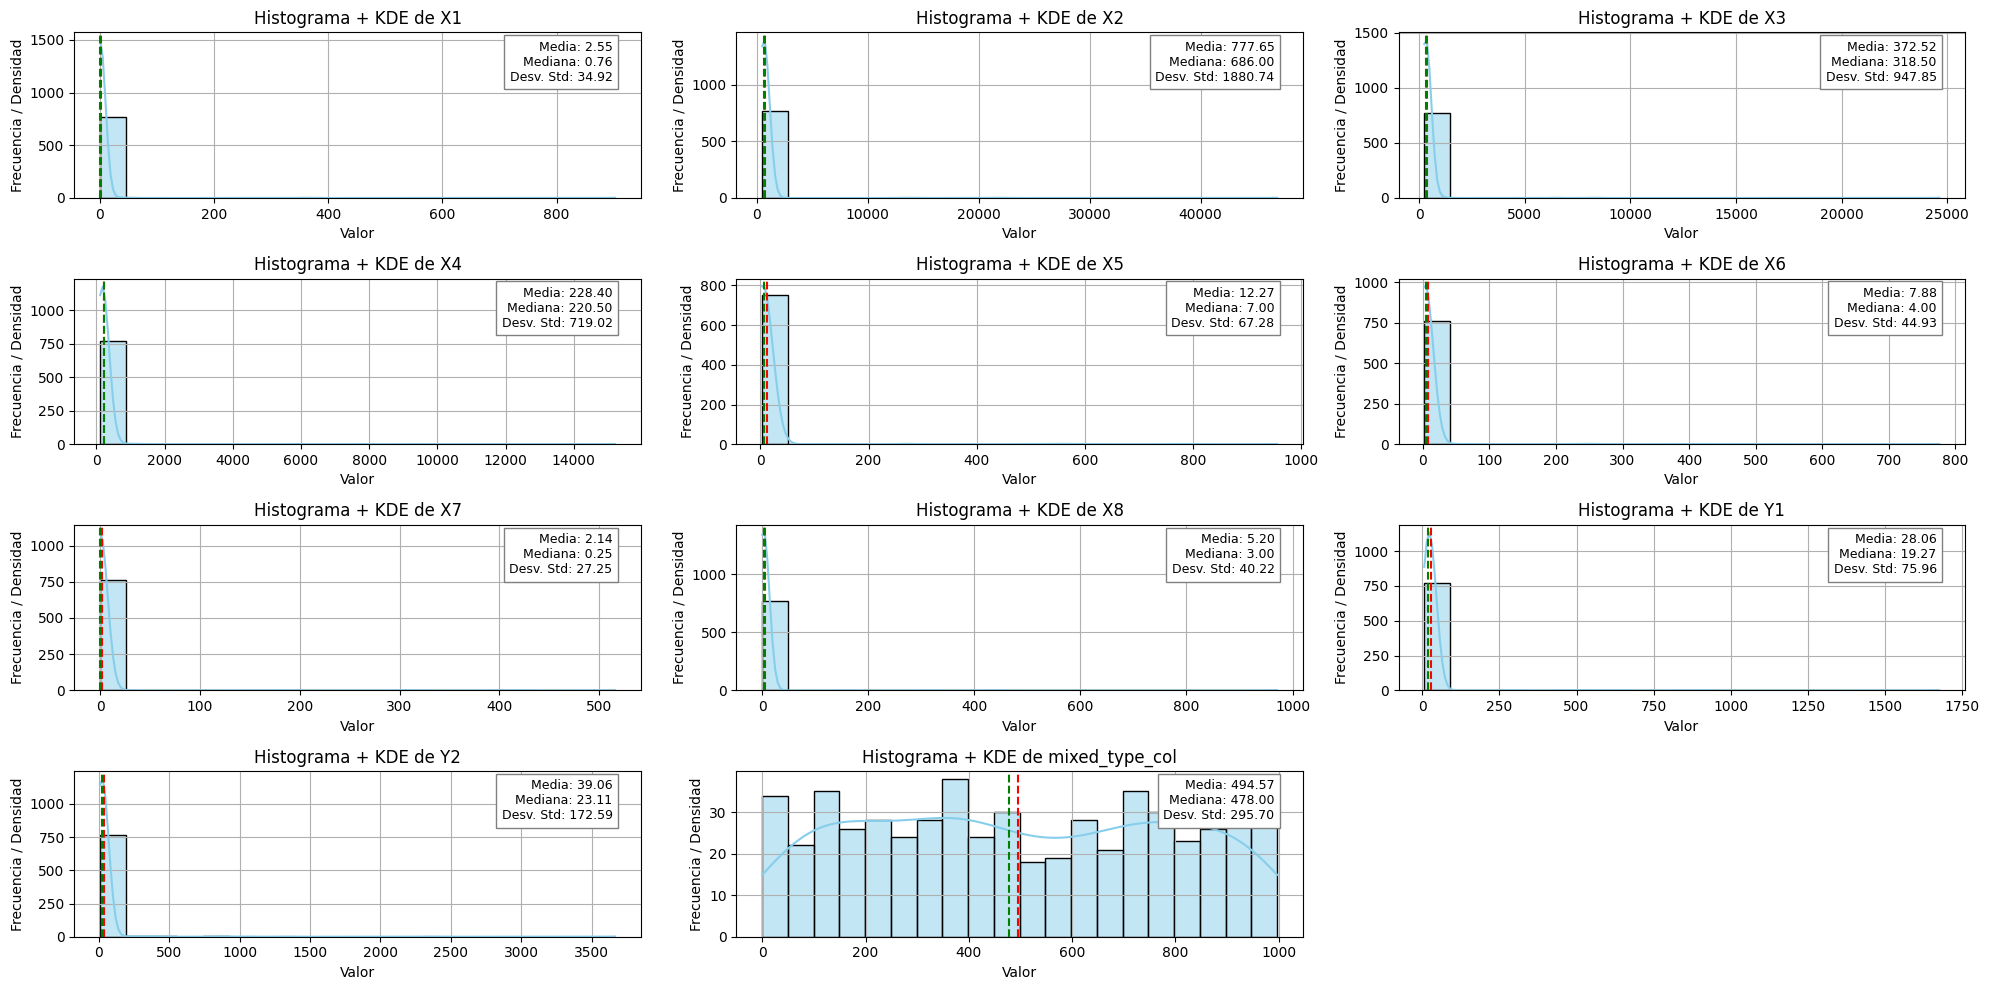

In [20]:
# Generación de histogramas y curvas KDE para todas las columnas numéricas del DataFrame
plot_histograms(df_clean)

In [21]:
def analyze_distribution(df):
    """
    Analiza la distribución de cada columna de un DataFrame, calculando asimetría (skew) 
    y curtosis (kurtosis), y clasificando el tipo de distribución según valores umbrales.

    Parámetros:
        df (pd.DataFrame) : DataFrame cuyas columnas serán analizadas en términos de distribución.

    Retorno:
        None : La función muestra un DataFrame resumen con las métricas de skew y kurtosis 
               y sus clasificaciones, sin retornar valores.
    """

    # 1) Inicializar diccionario para almacenar resultados
    results = {}                                    # Diccionario que contendrá métricas y tipos para cada columna

    # 2) Iterar sobre cada columna del DataFrame
    for column in df.columns:
        data = df[column].dropna()                  # Elimina valores nulos antes del cálculo
        skew_val = skew(data)                       # Calcula la asimetría
        kurt_val = kurtosis(data)                   # Calcula la curtosis

        # 3) Clasificar tipo de asimetría
        if skew_val < -0.5:
            skew_type = 'Asimetría negativa'        # Distribución sesgada a la izquierda
        elif skew_val > 0.5:
            skew_type = 'Asimetría positiva'        # Distribución sesgada a la derecha
        else:
            skew_type = 'Aproximadamente simétrica' # Distribución cercana a simétrica

        # 4) Clasificar tipo de curtosis
        if kurt_val < -1:
            kurt_type = 'Platicúrtica (plana)'      # Distribución con colas más ligeras
        elif kurt_val > 1:
            kurt_type = 'Leptocúrtica (picuda)'     # Distribución con colas más pesadas
        else:
            kurt_type = 'Mesocúrtica (normal)'      # Distribución aproximadamente normal

        # 5) Guardar resultados de la columna en el diccionario
        results[column] = {
            'skew': round(skew_val, 3),             # Asimetría redondeada
            'skew_type': skew_type,                 # Clasificación de asimetría
            'kurtosis': round(kurt_val, 3),         # Curtosis redondeada
            'kurtosis_type': kurt_type              # Clasificación de curtosis
        }

    # 6) Convertir resultados en DataFrame y mostrar
    results_df = pd.DataFrame(results).T            # Transpone para tener columnas como métricas
    display(results_df)                             # Muestra el DataFrame resumen

In [22]:
# Análisis de asimetría y curtosis del DataFrame limpio

# 1) Mostrar encabezado del análisis
print("********* Análisis de Asimetría (Skewness) y Curtosis (Kurtosis) *********")

# 2) Ejecutar función de análisis de distribución
analyze_distribution(df_clean)

********* Análisis de Asimetría (Skewness) y Curtosis (Kurtosis) *********


,skew,skew_type,kurtosis,kurtosis_type
X1,23.531,Asimetría positiva,582.49,Leptocúrtica (picuda)
X2,21.227,Asimetría positiva,487.423,Leptocúrtica (picuda)
X3,22.863,Asimetría positiva,563.106,Leptocúrtica (picuda)
X4,16.398,Asimetría positiva,294.488,Leptocúrtica (picuda)
X5,10.562,Asimetría positiva,117.463,Leptocúrtica (picuda)
X6,12.105,Asimetría positiva,162.745,Leptocúrtica (picuda)
X7,15.744,Asimetría positiva,258.882,Leptocúrtica (picuda)
X8,20.276,Asimetría positiva,451.418,Leptocúrtica (picuda)
Y1,16.488,Asimetría positiva,315.387,Leptocúrtica (picuda)
Y2,16.163,Asimetría positiva,296.974,Leptocúrtica (picuda)


**Análisis de Districuión, Asimetría (Skewness) y Curtosis (Kurtosis)**

Al examinar las métricas de asimetría y curtosis de las variables numéricas, se observan los siguientes hallazgos:

1. **Asimetría (Skewness)**:
    - La mayoría de las variables presentan valores de *skewness* **altamente positivos**.
    - Esto indica distribuciones **fuertemente sesgadas a la derecha**, lo que sugiere la presencia de colas largas con valores extremos grandes.
    - Solo la columna `mixed_type_col` presenta una **asimetría cercana a cero**, lo cual la ubica como una distribución **aproximadamente simétrica**.

2. **Curtosis (Kurtosis)**:
    - La mayoría de las variables tienen valores **extremadamente altos** de curtosi.
    - Esto caracteriza a estas distribuciones como **Leptocúrticas**, es decir, con picos muy agudos y colas pesadas, lo cual refuerza la idea de presencia de valores atípicos significativos.
    - En contraste, la variable `mixed_type_col` muestra una curtosis negativa, clasificada como **Platicúrtica**, indicando una distribución más plana y con colas más ligeras que una normal.

3. **Implicaciones para el análisis**:
    - Las fuertes asimetrías y curtosis elevadas sugieren que **la mayoría de las variables no siguen una distribución normal**.
    - Todo este análisis, respalda la necesidad de un enfoque diferenciado en la imputación de valores faltantes:
      * Para variables con distribución normal (o aproximadamente simétrica), usar la **media**.
      * Para variables altamente sesgadas, optar por la **mediana**, ya que es más robusta frente a colas largas y valores extremos.
      * Como ninguna columna tiene un número suficientemente grande de faltantes (**~25%**), todas se conservarán.
    - Otra vez, la columna `mixed_type_col` no sigue el mismo comportamiento que las otras y tiene un comportamiento más estable, con menor concentración en los extremos. Se debe evaluar su relevancia dentro del conjunto de variables, ya que difiere en naturaleza respecto a las otras.

### c) Imputación de Datos Faltantes

In [23]:
def impute_missing_values(df):
    """
    Imputa los valores faltantes en un DataFrame utilizando la media o la mediana según la asimetría de cada columna.
    Para columnas aproximadamente simétricas se usa la media, y para columnas asimétricas se usa la mediana.

    Parámetros:
        df (pd.DataFrame) : DataFrame con posibles valores faltantes.

    Retorno:
        pd.DataFrame : DataFrame con los valores faltantes imputados según la estrategia de asimetría.
    """

    # 1) Crear una copia del DataFrame original
    df_imputed = df.copy()                                                      # Evita modificar el DataFrame original

    # 2) Iterar sobre cada columna para imputar valores faltantes
    for col in df_imputed.columns:
        col_skew = skew(df_imputed[col].dropna())                               # Calcula la asimetría ignorando valores NaN

        # 3) Imputar según tipo de asimetría
        if -0.5 <= col_skew <= 0.5:
            df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())    # Columna aproximadamente simétrica: imputar con media
        else:
            df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())  # Columna asimétrica: imputar con mediana

    # 4) Retornar el DataFrame con valores imputados
    return df_imputed

In [24]:
# Imputación de valores faltantes en el DataFrame limpio y análisis posterior

# 1) Aplicar función de imputación de valores faltantes
df_imputed_missing = impute_missing_values(df_clean)

# 2) Mostrar encabezado del análisis post-imputación
print("********* Análisis de Datos después de la Imputación de Valores Faltantes *********")

# 3) Ejecutar función de estadística y resumen sobre el DataFrame imputado
show_stats(df_imputed_missing)

********* Análisis de Datos después de la Imputación de Valores Faltantes *********


=== Forma del DataFrame ===
Filas: 783  |  Columnas: 11


=== Resumen por Columna ===


,dtype,Valores Únicos,Nulos,% Nulos
X1,float64,18,0,0.0
X2,float64,19,0,0.0
X3,float64,16,0,0.0
X4,float64,13,0,0.0
X5,float64,12,0,0.0
X6,float64,14,0,0.0
X7,float64,11,0,0.0
X8,float64,10,0,0.0
Y1,float64,583,0,0.0
Y2,float64,632,0,0.0




=== Estadísticas Descriptivas ===


,count,mean,std,min,25%,50%,75%,max
X1,783.0,2.527165,34.720753,0.62,0.69,0.760000,0.840,902.62
X2,783.0,776.483397,1868.708920,514.50,612.50,686.000000,759.500,46893.00
X3,783.0,371.619413,939.963110,245.00,294.00,318.500000,343.000,24622.50
X4,783.0,228.302363,714.411740,110.25,147.00,220.500000,220.500,15214.50
X5,783.0,12.143040,66.465474,3.50,3.50,7.000000,7.000,955.50
X6,783.0,7.810983,44.556927,2.00,3.00,4.000000,5.000,776.00
X7,783.0,2.104662,27.010051,0.00,0.10,0.250000,0.400,516.00
X8,783.0,5.169860,39.937073,0.00,1.00,3.000000,4.000,971.00
Y1,783.0,27.976649,75.620273,6.01,13.02,19.270000,32.105,1676.70
Y2,783.0,38.871903,171.603947,10.90,15.77,23.110000,33.370,3665.13


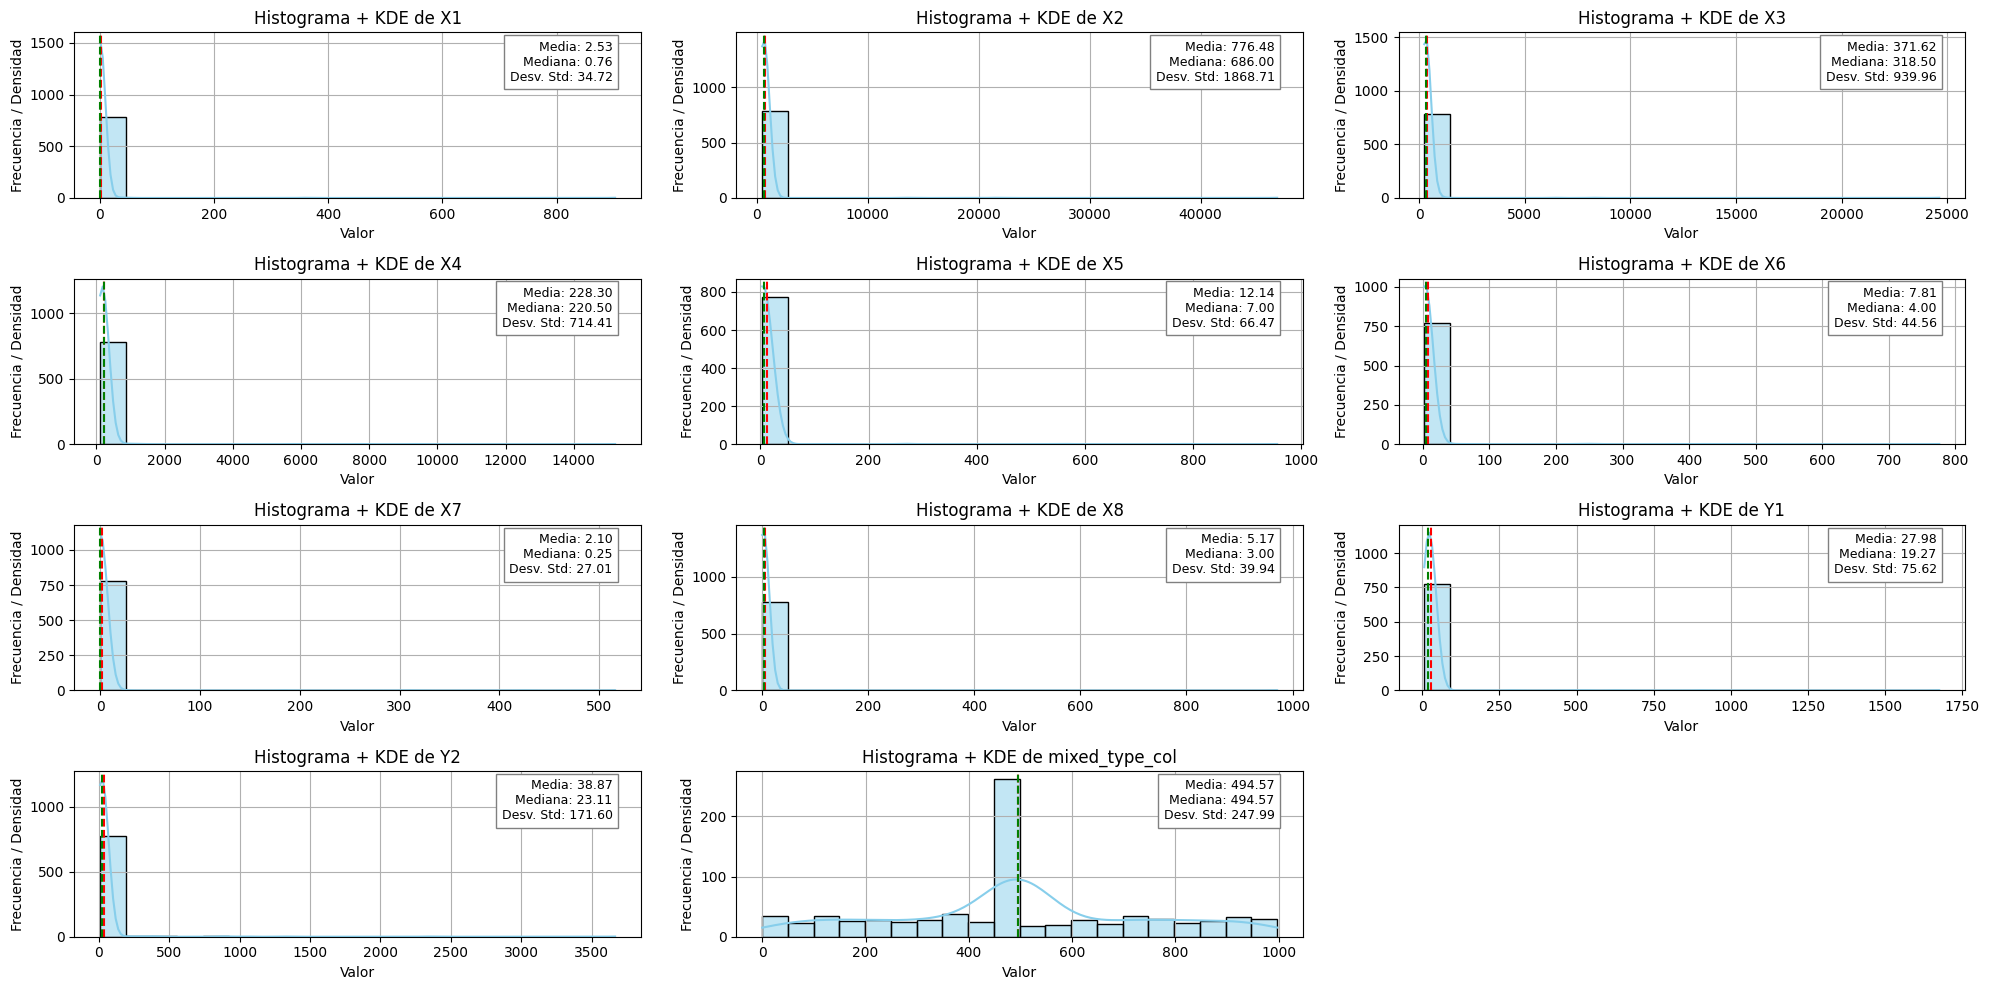

In [25]:
# Generación de histogramas y curvas KDE para todas las columnas numéricas del DataFrame
plot_histograms(df_imputed_missing)

In [26]:
# Análisis de asimetría y curtosis después de la imputación de valores faltantes

# 1) Mostrar encabezado del análisis
print("********* Análisis de Distribución después de la Imputación de Valores Faltantes *********")

# 2) Ejecutar función de análisis de distribución
analyze_distribution(df_imputed_missing)

********* Análisis de Distribución después de la Imputación de Valores Faltantes *********


,skew,skew_type,kurtosis,kurtosis_type
X1,23.668,Asimetría positiva,589.319,Leptocúrtica (picuda)
X2,21.364,Asimetría positiva,493.791,Leptocúrtica (picuda)
X3,23.056,Asimetría positiva,572.689,Leptocúrtica (picuda)
X4,16.504,Asimetría positiva,298.345,Leptocúrtica (picuda)
X5,10.696,Asimetría positiva,120.504,Leptocúrtica (picuda)
X6,12.209,Asimetría positiva,165.572,Leptocúrtica (picuda)
X7,15.888,Asimetría positiva,263.684,Leptocúrtica (picuda)
X8,20.421,Asimetría positiva,457.918,Leptocúrtica (picuda)
Y1,16.563,Asimetría positiva,318.251,Leptocúrtica (picuda)
Y2,16.257,Asimetría positiva,300.472,Leptocúrtica (picuda)


**Análisis después de la Imputación de Valores Faltantes**

- El DataFrame mantiene **783 registros y 11 columnas**, sin valores faltantes y todos los tipos `float64`.

- La mayoría de las variables siguen presentando **asimetría positiva y curtosis elevada** (distribuciones sesgadas y picudas), mientras que `mixed_type_col` es **aproximadamente simétrica y mesocúrtica**.

- Persisten valores extremos en varias columnas, indicando la necesidad de **análisis de outliers** en la siguiente fase.


In [27]:
# Versionado de Datos
save_and_version(df_imputed_missing, "energy_modified_imputed_missing.csv", "Add energy_modified_imputed_missing dataset")

Saved CSV: Dataset/energy_modified_imputed_missing.csv
 ⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/cremercado/Desktop/MLops_E38/.dvc/cache/files/md5
                                                                                
!
  0%|          |Adding Dataset/energy_modified_imputed0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/cremercado/Desktop0/1 [00:00<?,    ?files/s]
100% Adding...|███████████████████████████████████████|1/1 [00:00, 120.24file/s]

To track the changes with git, run:

	git add Dataset/.gitignore Dataset/energy_modified_imputed_missing.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
[main 7e726e8] Add energy_modified_imputed_missing dataset
 Committer: Christian E. Mercado <c

### d) Boxplots y Análisis de Límites

Una vez imputados los valores faltantes, se procederá a identificar posibles valores atípicos en las variables numéricas. Para ello, se utilizará una visualización mediante gráficos de caja o **Boxplots**, que permiten detectar desviaciones significativas respecto a la distribución central de cada variable.

La detección se basará en el método del rango intercuartílico (IQR), calculando los límites inferior y superior como:

$$\text{Límite inferior} = Q_1 - 1.5 \times IQR \quad \text{y} \quad \text{Límite superior} = Q_3 + 1.5 \times IQR$$

Los valores que se encuentren fuera de estos rangos serán considerados atípicos. En lugar de eliminarlos, se optará por una estrategia de imputación más adelante.

In [28]:
def boxplots(df):
    """
    Genera boxplots para cada columna de un DataFrame, mostrando la distribución, valores atípicos y estadísticas resumen.

    Parámetros:
        df (pd.DataFrame) : DataFrame cuyas columnas se van a representar en boxplots.

    Retorno:
        None : La función genera y muestra gráficos directamente, sin retornar valores.
    """

    # 1) Obtener lista de columnas del DataFrame
    columnas = df.columns                                                               # Lista de nombres de columnas

    # 2) Crear figura y ejes para los subplots
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 8))                         # Crear grid de 4x3 subplots
    axes = axes.flatten()                                                               # Aplana la matriz de ejes para iterar fácilmente

    # 3) Generar boxplot para cada columna
    for i, col in enumerate(columnas):
        df[[col]].plot(kind='box',                                                      # Tipo de gráfico boxplot
                        patch_artist=True,                                              # Relleno de cajas
                        color=dict(boxes='lightblue', whiskers='gray', medians='red'),  # Colores personalizados
                        ax=axes[i])                                                     # Asignar subplot correspondiente
        axes[i].set_title(f'Boxplot de {col}')                                          # Título del subplot
        axes[i].set_ylabel('Valor')                                                     # Etiqueta eje Y
        axes[i].grid(True)                                                              # Activar cuadrícula

    # 4) Desactivar ejes sobrantes si hay más subplots que columnas
    if len(axes) > len(columnas):
        axes[-1].axis('off')                                                            # Ocultar el último eje sobrante

    # 5) Ajustar layout y mostrar la figura
    plt.tight_layout()                                                                  # Ajustar espacios entre subplots
    plt.show()                                                                          # Mostrar los gráficos

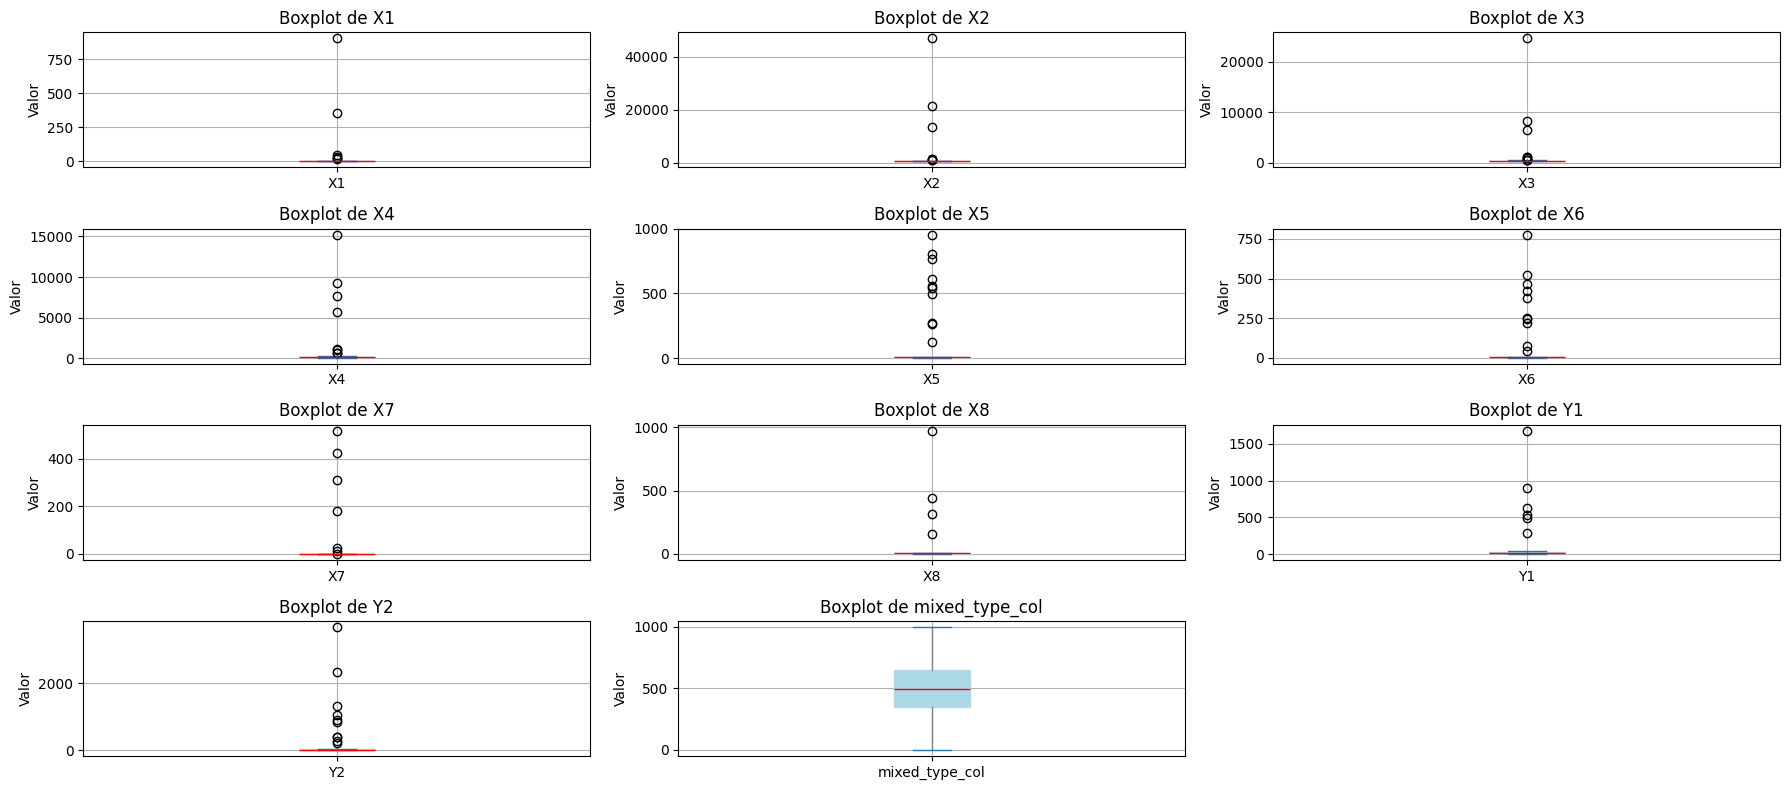

In [29]:
# Generación de boxplots para cada columna del DataFrame
boxplots(df_imputed_missing)

In [30]:
def analyze_data_spread(df):
    """
    Analiza la dispersión de los datos de un DataFrame utilizando el rango intercuartílico (IQR)
    y calcula los límites para identificar posibles valores atípicos (outliers) en cada columna numérica.

    Parámetros:
        df (pd.DataFrame) : DataFrame cuyas columnas serán analizadas en términos de dispersión.

    Retorno:
        None : La función muestra un DataFrame resumen con IQR, límites y conteo de outliers, sin retornar valores.
    """

    # 1) Inicializar lista para almacenar resultados
    results = []                                                            # Lista que contendrá diccionarios con métricas de cada columna

    # 2) Iterar sobre cada columna del DataFrame
    for column in df.columns:
        data = df[column].dropna()                                          # Elimina valores nulos antes del análisis

        # 3) Validar si la columna es vacía o no numérica
        if data.empty or not np.issubdtype(data.dtype, np.number):
            results.append({
                "Columna": column,
                "IQR": np.nan,
                "Límite Inf.": np.nan,
                "Límite Sup.": np.nan,
                "Outliers": 0
            })
            continue                                                        # Saltar columnas no numéricas

        # 4) Calcular rango intercuartílico y límites para outliers
        q1 = data.quantile(0.25)                                            # Primer cuartil (25%)
        q3 = data.quantile(0.75)                                            # Tercer cuartil (75%)
        iqr = q3 - q1                                                       # Rango intercuartílico
        lower_bound = q1 - 1.5 * iqr                                        # Límite inferior para detectar outliers
        upper_bound = q3 + 1.5 * iqr                                        # Límite superior para detectar outliers
        outlier_count = ((data < lower_bound) | (data > upper_bound)).sum() # Conteo de outliers

        # 5) Guardar resultados de la columna
        results.append({
            "Columna": column,
            "IQR": iqr,
            "Límite Inf.": lower_bound,
            "Límite Sup.": upper_bound,
            "Outliers": outlier_count
        })

    # 6) Convertir resultados en DataFrame y mostrar
    result_df = pd.DataFrame(results).set_index("Columna")                  # DataFrame con métricas de dispersión
    display(result_df)                                                      # Muestra el DataFrame resumen

In [31]:
# Análisis de valores atípicos utilizando IQR y límites para cada columna del DataFrame imputado

# 1) Mostrar encabezado del análisis
print("********* Análisis de Valores Atípicos, IQR y Límites *********")

# 2) Ejecutar función de análisis de dispersión
analyze_data_spread(df_imputed_missing)

********* Análisis de Valores Atípicos, IQR y Límites *********


,IQR,Límite Inf.,Límite Sup.,Outliers
Columna,,,,
X1,0.150,0.4650,1.0650,6
X2,147.000,392.0000,980.0000,7
X3,49.000,220.5000,416.5000,9
X4,73.500,36.7500,330.7500,8
X5,3.500,-1.7500,12.2500,10
X6,2.000,0.0000,8.0000,10
X7,0.300,-0.3500,0.8500,7
X8,3.000,-3.5000,8.5000,4
Y1,19.085,-15.6075,60.7325,6


**Análisis de Valores Atípicos (Outliers), IQR y Límites**

Al examinar las métricas de Outliers, IQR y Límites, se observan los siguientes hallazgos:

1. La mayoría de las columnas presentan **outliers detectables**, lo cual indica la presencia de valores extremos que pueden influir en medidas de tendencia central y dispersión:
    - Las columnas entre `X1` y `X8` muestran entre **4 y 10 outliers**.
    - `Y1` y `Y2` también presentan outliers, reflejando variabilidad alta en estas variables.
    - La columna `mixed_type_col` no presenta outliers según el criterio del IQR, a pesar de su rango amplio (lo cual confirma su diferencia de comportamiento con respecto a las otras variables).

2. Las columnas con **valores negativos en los límites inferiores** (`X5`, `X6`, `X7`, `X8`, `Y1`, `Y2`) evidencian que la distribución de estos datos es altamente sesgada, reforzando los hallazgos de **asimetría positiva** previos.

3. Este análisis respalda la necesidad de **estrategias de tratamiento de outliers** en la siguiente fase, pudiendo optar por:
    - **Recorte (capping)** de valores extremos usando los límites IQR.
    - **Transformaciones** (logarítmica, raíz cuadrada, Box-Cox) para reducir el efecto de valores extremos en la distribución.

### e) Imputación de Datos Atípicos

Una vez identificados los **valores atípicos** (*outliers*), es fundamental aplicar un ajuste, ya que el análisis de *skewness* (asimetría) reveló coeficientes extremadamente altos (superiores a 10). Esto refleja una **distribución altamente sesgada**, en la que los valores extremos pueden distorsionar las métricas centrales y la variabilidad real de los datos.

La simple **imputación por la media** no resulta adecuada en este escenario, pues la media está arrastrada por los extremos y genera un **sesgo artificial** en el centro de la distribución, además de subestimar la dispersión.

La solución más adecuada consiste en aplicar:

1. **Capping (Winsorizing o truncado de extremos):** Los valores que exceden un umbral predefinido (como el percentil 1 y el 99, o el límite intercuartílico extendido) se reemplazan por el valor de dicho límite.

   * Esto reduce la influencia desproporcionada de los valores aberrantes.
   * Mantiene la estructura general de la distribución.
   * Evita la pérdida de información al conservar todos los registros.

Con esta técnica, se logra un **equilibrio entre robustez y simplicidad**, disminuyendo el impacto de los outliers sin necesidad de transformaciones adicionales, y dejando el conjunto de datos en mejores condiciones para el modelado predictivo y el análisis estadístico.

In [32]:
def impute_outliers(df):
    """
    Imputa los valores atípicos de un DataFrame truncando los valores por encima del percentil 99 (p99)
    para columnas numéricas, reduciendo así la influencia de outliers extremos.

    Parámetros:
        df (pd.DataFrame) : DataFrame con posibles valores atípicos en columnas numéricas.

    Retorno:
        pd.DataFrame : DataFrame con valores atípicos truncados al percentil 99 en cada columna numérica.
    """

    # 1) Crear una copia del DataFrame original
    df_transformed = df.copy()                                                              # Evita modificar el DataFrame original

    # 2) Seleccionar solo columnas numéricas
    num_cols = df_transformed.select_dtypes(include=[np.number]).columns                    # Identifica columnas de tipo numérico

    # 3) Iterar sobre cada columna numérica para truncar valores atípicos
    for col in num_cols:
        p99 = df_transformed[col].quantile(0.99)                                            # Calcular el percentil 99

        # 4) Truncar valores que superen el percentil 99
        df_transformed[col] = np.where(df_transformed[col] > p99, p99, df_transformed[col]) # Reemplaza valores mayores a p99

    # 5) Retornar DataFrame transformado
    return df_transformed

In [33]:
# Imputación de valores atípicos en el DataFrame imputado y análisis posterior

# 1) Aplicar función de imputación de outliers
df_imputed_outliers = impute_outliers(df_imputed_missing)

# 2) Mostrar encabezado del análisis post-imputación de outliers
print("********* Análisis de Datos después del Proceso de Imputación de Outliers *********")

# 3) Ejecutar función de estadística y resumen sobre el DataFrame con outliers imputados
show_stats(df_imputed_outliers)

********* Análisis de Datos después del Proceso de Imputación de Outliers *********


=== Forma del DataFrame ===
Filas: 783  |  Columnas: 11


=== Resumen por Columna ===


,dtype,Valores Únicos,Nulos,% Nulos
X1,float64,12,0,0.0
X2,float64,12,0,0.0
X3,float64,9,0,0.0
X4,float64,6,0,0.0
X5,float64,5,0,0.0
X6,float64,7,0,0.0
X7,float64,4,0,0.0
X8,float64,6,0,0.0
Y1,float64,576,0,0.0
Y2,float64,625,0,0.0




=== Estadísticas Descriptivas ===


,count,mean,std,min,25%,50%,75%,max
X1,783.0,0.765773,0.106029,0.62,0.69,0.760000,0.840,0.9800
X2,783.0,672.983397,87.878558,514.50,612.50,686.000000,759.500,808.5000
X3,783.0,321.721865,49.706604,245.00,294.00,318.500000,343.000,547.0900
X4,783.0,178.921060,49.003552,110.25,147.00,220.500000,220.500,369.4300
X5,783.0,8.463653,28.234676,3.50,3.50,7.000000,7.000,266.6300
X6,783.0,4.634176,10.048842,2.00,3.00,4.000000,5.000,98.8200
X7,783.0,0.236526,0.132289,0.00,0.10,0.250000,0.400,0.4000
X8,783.0,2.791826,1.545999,0.00,1.00,3.000000,4.000,5.0000
Y1,783.0,22.543103,10.218296,6.01,13.02,19.270000,32.105,42.8042
Y2,783.0,27.898103,30.011694,10.90,15.77,23.110000,33.370,287.1506


In [34]:
# Visualización de las primeras filas del DataFrame
df_imputed_outliers.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,mixed_type_col
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,637.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,618.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,412.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,243.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,979.0


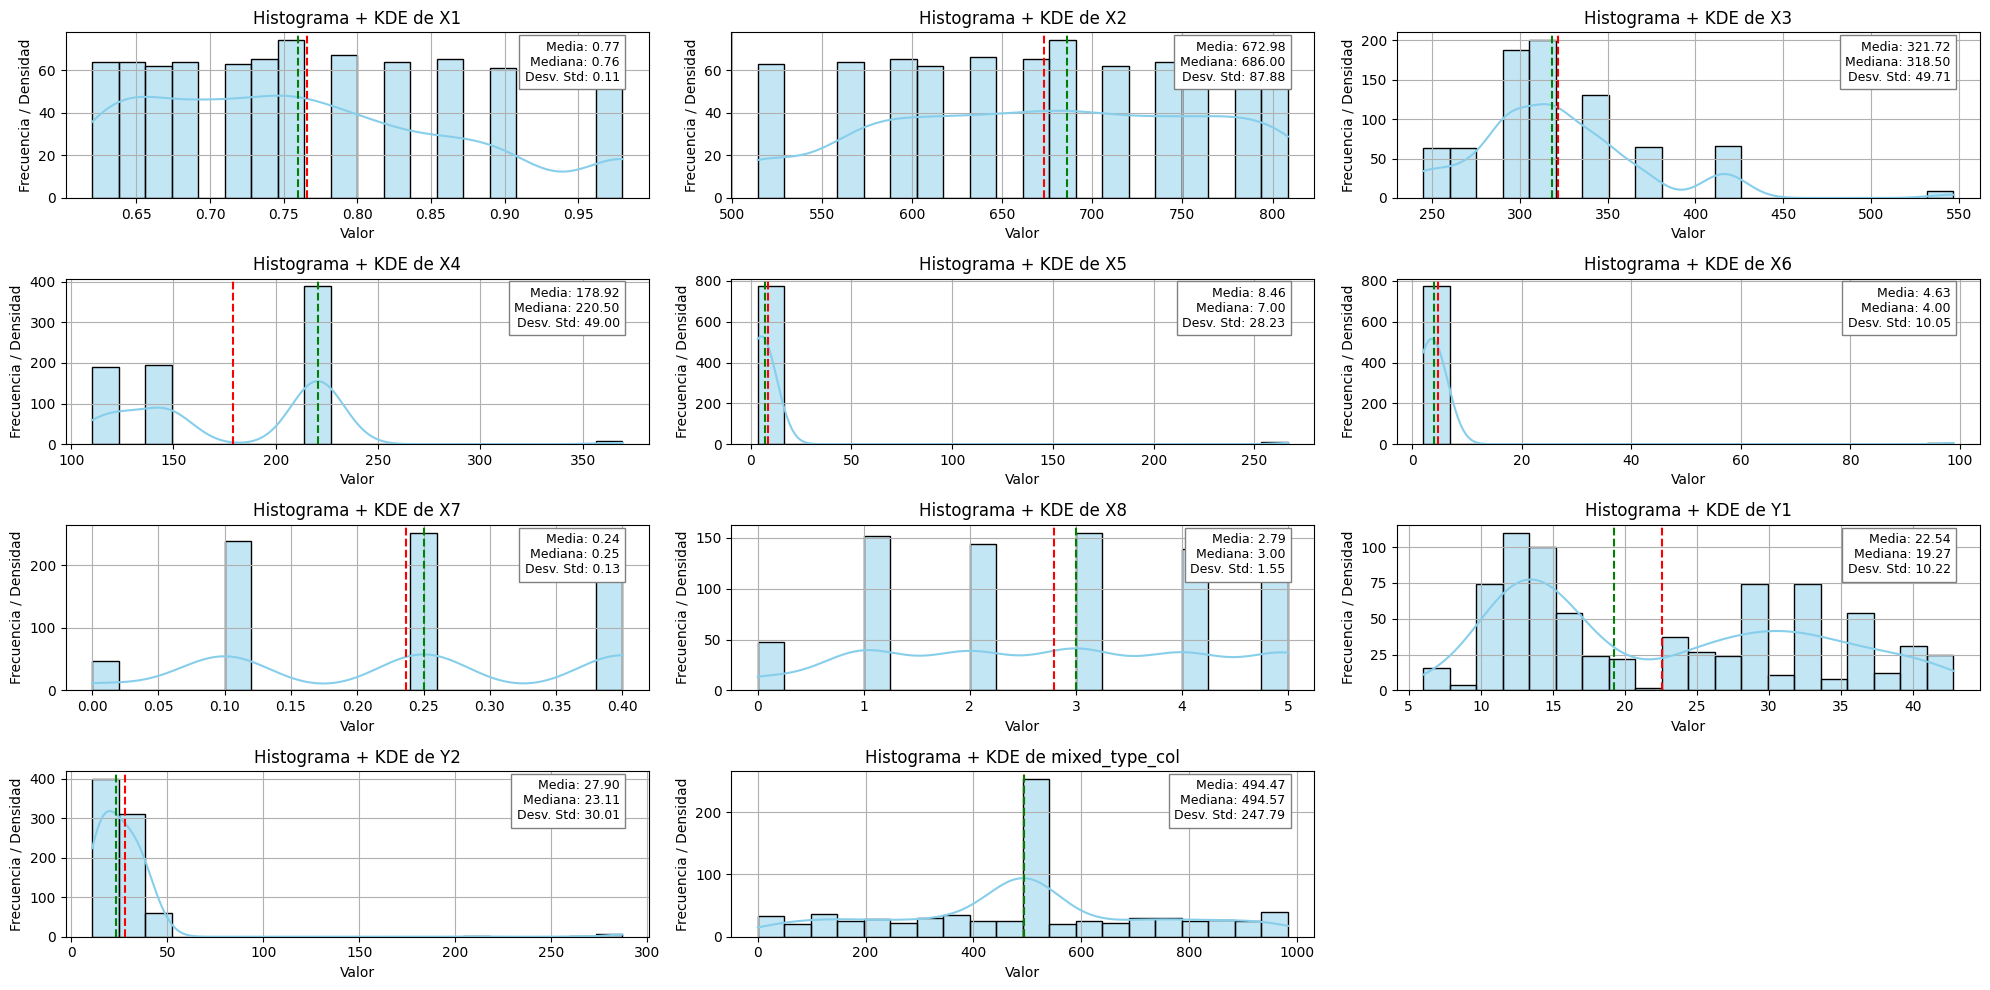

In [35]:
# Generación de histogramas y curvas KDE para todas las columnas numéricas del DataFrame
plot_histograms(df_imputed_outliers)

In [36]:
# Análisis de asimetría y curtosis después del tratamiento de valores atípicos

# 1) Mostrar encabezado del análisis
print("********* Análisis de Distribución después del Proceso de Imputación de Outliers *********")

# 2) Ejecutar función de análisis de distribución
analyze_distribution(df_imputed_outliers)

********* Análisis de Distribución después del Proceso de Imputación de Outliers *********


,skew,skew_type,kurtosis,kurtosis_type
X1,0.496,Aproximadamente simétrica,-0.686,Mesocúrtica (normal)
X2,-0.131,Aproximadamente simétrica,-1.041,Platicúrtica (plana)
X3,1.304,Asimetría positiva,3.63,Leptocúrtica (picuda)
X4,0.381,Aproximadamente simétrica,0.282,Mesocúrtica (normal)
X5,8.886,Asimetría positiva,77.847,Leptocúrtica (picuda)
X6,8.886,Asimetría positiva,78.942,Leptocúrtica (picuda)
X7,-0.084,Aproximadamente simétrica,-1.305,Platicúrtica (plana)
X8,-0.063,Aproximadamente simétrica,-1.143,Platicúrtica (plana)
Y1,0.356,Aproximadamente simétrica,-1.245,Platicúrtica (plana)
Y2,7.489,Asimetría positiva,60.748,Leptocúrtica (picuda)


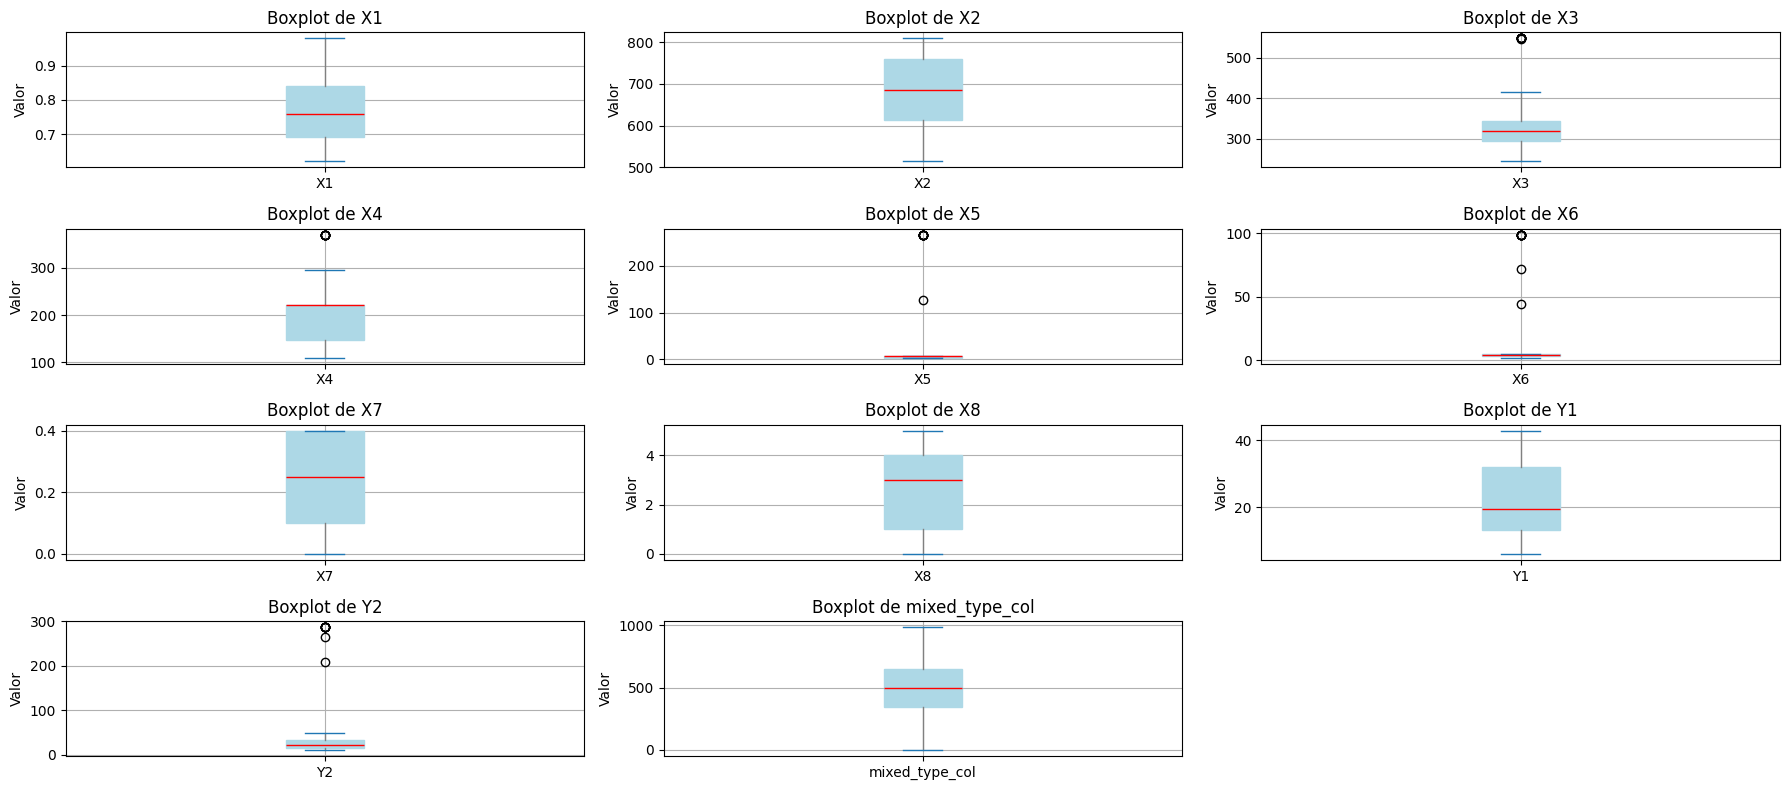

In [37]:
# Generación de boxplots para cada columna del DataFrame
boxplots(df_imputed_outliers)

In [38]:
# Análisis de valores atípicos utilizando IQR y límites después del tratamiento de outliers

# 1) Mostrar encabezado del análisis
print("********* Análisis de Valores Atípicos, IQR y Límites después del Proceso de Imputación de Outliers *********")

# 2) Ejecutar función de análisis de dispersión
analyze_data_spread(df_imputed_outliers)

********* Análisis de Valores Atípicos, IQR y Límites después del Proceso de Imputación de Outliers *********


,IQR,Límite Inf.,Límite Sup.,Outliers
Columna,,,,
X1,0.150,0.4650,1.0650,0
X2,147.000,392.0000,980.0000,0
X3,49.000,220.5000,416.5000,9
X4,73.500,36.7500,330.7500,8
X5,3.500,-1.7500,12.2500,10
X6,2.000,0.0000,8.0000,10
X7,0.300,-0.3500,0.8500,0
X8,3.000,-3.5000,8.5000,0
Y1,19.085,-15.6075,60.7325,0


**Análisis despues de Imputación de Datos Atípicos (Outliers)**

Tras la identificación de **valores atípicos** mediante el análisis de *boxplots* y límites de IQR, se aplicó un proceso de **Capping** para tratar *outliers*:

1. **Mitigación de outliers mediante Capping:**
    - Los valores que superaban los límites establecidos por el IQR fueron reemplazados por los valores de los percentiles correspondientes (Capping).
    - Como resultado, la mayoría de las columnas ahora **presenta reducción outliers**, con excepción de algunas columnas.

3. **Estadísticas descriptivas estabilizadas:**
   * La media y la desviación estándar reflejan mejor la dispersión real de los datos, ya que los valores extremos ya no distorsionan los estadísticos centrales.
   * Los rangos se han acotado significativamente, facilitando comparaciones entre variables y evitando que los modelos predictivos se vean sesgados por outliers.

In [39]:
# Versionado de Datos
save_and_version(df_imputed_outliers, "energy_modified_imputed_outliers.csv", "Add energy_modified_imputed_outliers dataset")

Saved CSV: Dataset/energy_modified_imputed_outliers.csv
 ⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/cremercado/Desktop/MLops_E38/.dvc/cache/files/md5
                                                                                
!
  0%|          |Adding Dataset/energy_modified_imputed0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/cremercado/Desktop0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 92.96file/s]

To track the changes with git, run:

	git add Dataset/.gitignore Dataset/energy_modified_imputed_outliers.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
[main bbbfd51] Add energy_modified_imputed_outliers dataset
 Committer: Christian E. Mercado

## 4.3 Análisis Bivariante

### a) Análisis de Correlación

In [40]:
def correlation_matrices(df):
    """
    Calcula y muestra las matrices de correlación de un DataFrame utilizando los métodos Pearson y Spearman.

    Parámetros:
        df (pd.DataFrame) : DataFrame cuyas correlaciones se desean calcular.

    Retorno:
        tuple : Retorna una tupla con dos DataFrames (corr_pearson, corr_spearman) que contienen las matrices de correlación correspondientes.
    """

    # 1) Calcular matriz de correlación Pearson
    corr_pearson = df.corr(method='pearson')            # Calcula correlación lineal entre columnas
    print("\n=== Matriz de Correlación (Pearson) ===")  # Encabezado para Pearson
    display(corr_pearson)                               # Muestra la matriz de correlación Pearson

    # 2) Calcular matriz de correlación Spearman
    corr_spearman = df.corr(method='spearman')          # Calcula correlación de rangos entre columnas
    print("\n=== Matriz de Correlación (Spearman) ===") # Encabezado para Spearman
    display(corr_spearman)                              # Muestra la matriz de correlación Spearman

    # 3) Retornar ambas matrices de correlación
    return corr_pearson, corr_spearman

In [41]:
# Cálculo y visualización de matrices de correlación para el DataFrame
corr_pearson, corr_spearman = correlation_matrices(df_imputed_outliers)


=== Matriz de Correlación (Pearson) ===


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,mixed_type_col
X1,1.000000,-0.930413,-0.175743,-0.768417,0.003015,0.047089,-0.005889,0.009291,0.571777,0.174730,0.026619
X2,-0.930413,1.000000,0.179239,0.792093,-0.034320,-0.051212,-0.003382,0.009547,-0.625669,-0.184772,-0.028995
X3,-0.175743,0.179239,1.000000,-0.210617,0.008620,-0.040931,0.010420,-0.029036,0.376130,0.133420,-0.022143
X4,-0.768417,0.792093,-0.210617,1.000000,-0.043613,-0.031549,-0.008864,0.024380,-0.761892,-0.257976,-0.023419
X5,0.003015,-0.034320,0.008620,-0.043613,1.000000,-0.013188,0.019191,-0.016089,0.062006,0.007799,-0.036227
X6,0.047089,-0.051212,-0.040931,-0.031549,-0.013188,1.000000,-0.037688,-0.017428,-0.001884,-0.016123,0.030528
X7,-0.005889,-0.003382,0.010420,-0.008864,0.019191,-0.037688,1.000000,0.206671,0.254465,0.032235,-0.000418
X8,0.009291,0.009547,-0.029036,0.024380,-0.016089,-0.017428,0.206671,1.000000,0.067272,-0.033672,-0.045112
Y1,0.571777,-0.625669,0.376130,-0.761892,0.062006,-0.001884,0.254465,0.067272,1.000000,0.316974,-0.013432
Y2,0.174730,-0.184772,0.133420,-0.257976,0.007799,-0.016123,0.032235,-0.033672,0.316974,1.000000,0.004506



=== Matriz de Correlación (Spearman) ===


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,mixed_type_col
X1,1.000000,-0.949092,-0.239875,-0.823265,0.795088,0.011460,-0.005117,0.009596,0.594786,0.617262,0.032423
X2,-0.949092,1.000000,0.245053,0.828165,-0.805416,-0.009099,-0.003694,0.009641,-0.603263,-0.625810,-0.044489
X3,-0.239875,0.245053,1.000000,-0.175428,0.187743,0.015232,0.001780,-0.023988,0.450566,0.397789,-0.047054
X4,-0.823265,0.828165,-0.175428,1.000000,-0.854275,-0.007792,-0.003172,0.021209,-0.762415,-0.757950,-0.035067
X5,0.795088,-0.805416,0.187743,-0.854275,1.000000,-0.000607,0.010948,-0.012257,0.806157,0.798937,-0.005181
X6,0.011460,-0.009099,0.015232,-0.007792,-0.000607,1.000000,0.010886,0.007499,-0.000063,0.016991,-0.017645
X7,-0.005117,-0.003694,0.001780,-0.003172,0.010948,0.010886,1.000000,0.181035,0.305261,0.263620,0.001035
X8,0.009596,0.009641,-0.023988,0.021209,-0.012257,0.007499,0.181035,1.000000,0.047387,0.027673,-0.035514
Y1,0.594786,-0.603263,0.450566,-0.762415,0.806157,-0.000063,0.305261,0.047387,1.000000,0.930586,-0.008579
Y2,0.617262,-0.625810,0.397789,-0.757950,0.798937,0.016991,0.263620,0.027673,0.930586,1.000000,0.002436


In [42]:
def plot_correlation_heatmap(corr_matrix, title="Heatmap de Correlación"):
    """
    Genera un heatmap visual para una matriz de correlación, facilitando la interpretación de relaciones entre variables.

    Parámetros:
        corr_matrix (pd.DataFrame) : Matriz de correlación a visualizar.
        title (str, opc.)          : Título del gráfico (por defecto "Heatmap de Correlación").

    Retorno:
        None : La función muestra el heatmap directamente, sin retornar valores.
    """

    # 1) Crear figura
    plt.figure(figsize=(12, 10))                                                # Tamaño de la figura

    # 2) Generar heatmap con anotaciones
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) # Heatmap con colores y valores de correlación

    # 3) Configurar título y rotación de etiquetas
    plt.title(title, fontsize=16)                                               # Título del heatmap
    plt.xticks(rotation=45, ha='right')                                         # Rotación de etiquetas eje X
    plt.yticks(rotation=0)                                                      # Rotación de etiquetas eje Y

    # 4) Mostrar el gráfico
    plt.show()                                                                  # Renderiza el heatmap

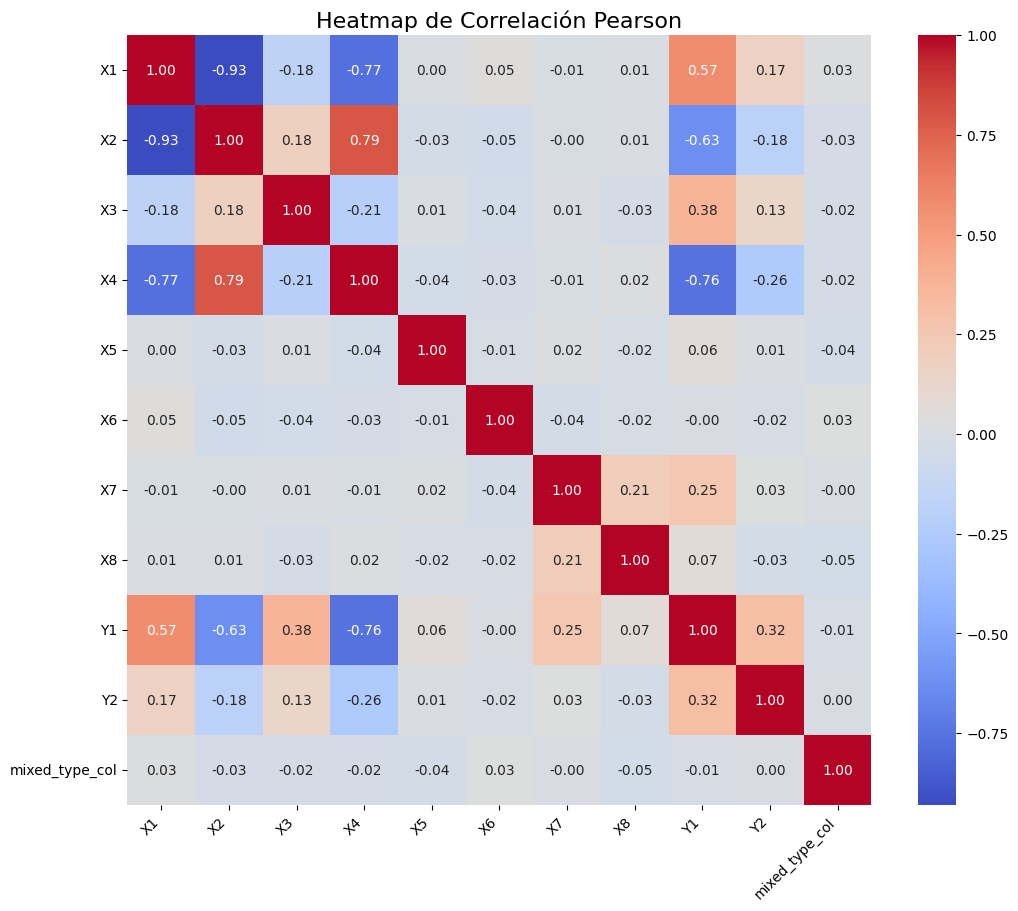

In [43]:
# Visualización de heatmap de la matriz de correlación Pearson
plot_correlation_heatmap(corr_pearson, title="Heatmap de Correlación Pearson")

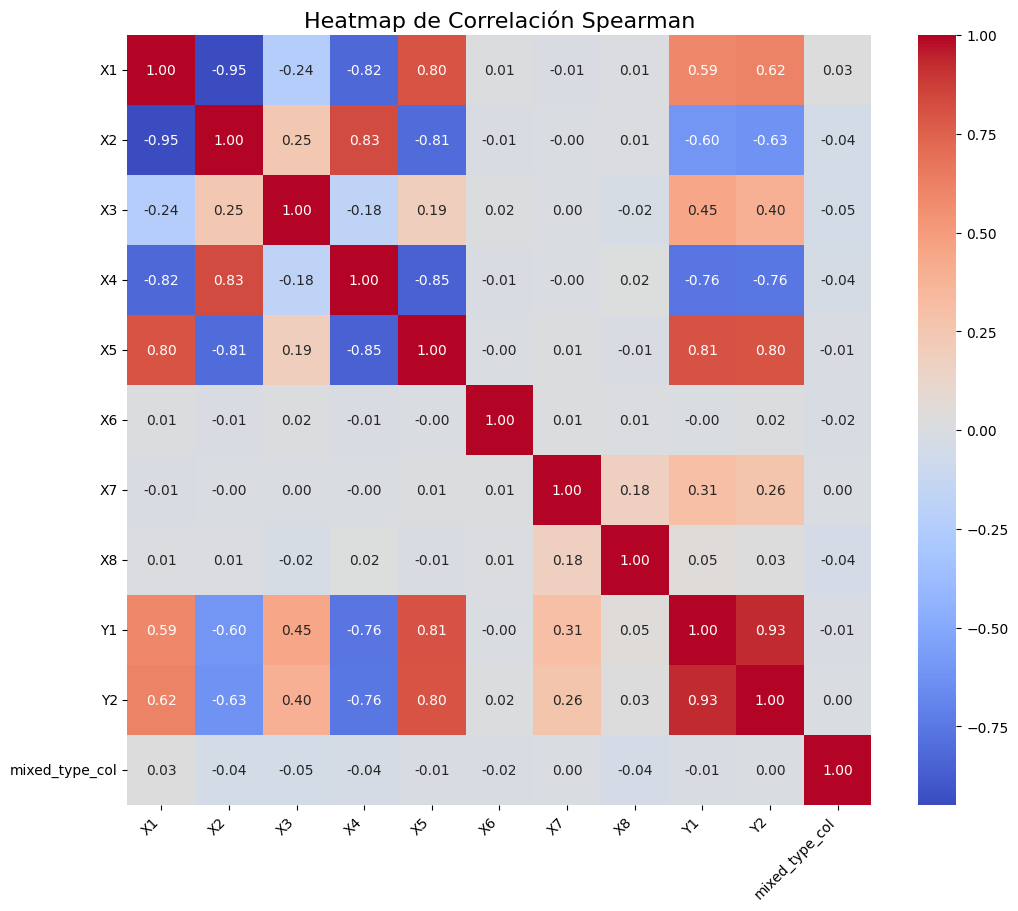

In [44]:
# Visualización de heatmap de la matriz de correlación Spearman
plot_correlation_heatmap(corr_spearman, title="Heatmap de Correlación Spearman")

In [45]:
def high_correlation_pairs(corr_matrix, threshold=0.7):
    """
    Identifica y muestra pares de variables con alta correlación en una matriz de correlación,
    según un umbral especificado.

    Parámetros:
        corr_matrix (pd.DataFrame) : Matriz de correlación de la cual se extraerán los pares.
        threshold (float, opc.)    : Valor mínimo absoluto de correlación para considerar un par como altamente correlacionado (por defecto 0.7).

    Retorno:
        None : La función muestra un DataFrame con pares de variables altamente correlacionadas, sin retornar valores.
    """

    # 1) Crear copia de la matriz de correlación y eliminar la diagonal
    corr_matrix = corr_matrix.copy()                                    # Evita modificar la matriz original
    np.fill_diagonal(corr_matrix.values, 0)                             # Establece diagonal en 0 para no considerar autocorrelaciones

    # 2) Convertir la matriz en formato de pares de variables
    corr_pairs = corr_matrix.stack().reset_index()                      # Apila la matriz para obtener pares
    corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']    # Renombrar columnas

    # 3) Filtrar pares con alta correlación según el umbral
    high_corr = corr_pairs[abs(corr_pairs['Correlación']) >= threshold].sort_values(by='Correlación', ascending=False).reset_index(drop=True)  # Filtra y ordena

    # 4) Mostrar los pares de alta correlación
    display(high_corr)                                                  # Muestra los pares en un DataFrame

In [46]:
# Identificación de pares de variables con alta correlación según Pearson

# 1) Mostrar encabezado del análisis
print("********* Análisis de Correlación con Método Pearson *********")

# 2) Ejecutar función para mostrar pares altamente correlacionados
high_correlation_pairs(corr_pearson, threshold=0.7)

********* Análisis de Correlación con Método Pearson *********


,Variable 1,Variable 2,Correlación
0,X2,X4,0.792093
1,X4,X2,0.792093
2,X4,Y1,-0.761892
3,Y1,X4,-0.761892
4,X1,X4,-0.768417
5,X4,X1,-0.768417
6,X1,X2,-0.930413
7,X2,X1,-0.930413


In [47]:
# Identificación de pares de variables con alta correlación según Spearman

# 1) Mostrar encabezado del análisis
print("********* Análisis de Correlación con Método Spearman *********")

# 2) Ejecutar función para mostrar pares altamente correlacionados
high_correlation_pairs(corr_spearman, threshold=0.8)

********* Análisis de Correlación con Método Spearman *********


,Variable 1,Variable 2,Correlación
0,Y1,Y2,0.930586
1,Y2,Y1,0.930586
2,X2,X4,0.828165
3,X4,X2,0.828165
4,X5,Y1,0.806157
5,Y1,X5,0.806157
6,X2,X5,-0.805416
7,X5,X2,-0.805416
8,X1,X4,-0.823265
9,X4,X1,-0.823265


**Análisis Bivariante: Correlaciones**

Se evaluaron las relaciones entre variables mediante **Pearson** y **Spearman**, encontrándose patrones consistentes en ambas métricas:

* **Fuertes correlaciones positivas**:

  * **Y1** y **Y2**: muy alta asociación entre carga de calefacción y carga de enfriamiento, lo que indica dependencia energética conjunta.
  * **X2** y **X4**: edificios con mayor superficie presentan también techos de mayor tamaño.
  * **X5** y **Y1**: edificios más altos tienden a requerir mayor carga de calefacción.

* **Fuertes correlaciones negativas**:

  * **X1** y **X2**: la superficie y la compacidad relativa muestran relación inversa muy marcada.
  * **X5** y **X4**: a mayor altura, menor área de techo.
  * **X1** y **X4**: la compacidad disminuye cuando aumenta el tamaño del techo.

* **Variables con baja o nula correlación**:

  * **X6** y **mixed_type_col** no presentan relaciones significativas con las demás variables.
  * **mixed_type_col**, en particular, mantiene un comportamiento independiente y poco explicativo, reforzando su baja calidad como predictor.

### b) Scatter Plots

In [48]:
def plot_scatter_vs_target(df, features, target):
    """
    Genera gráficos de dispersión (scatter plots) para cada variable independiente frente a una variable objetivo,
    permitiendo visualizar relaciones y tendencias entre las features y el target.

    Parámetros:
        df (pd.DataFrame)     : DataFrame que contiene las features y la variable objetivo.
        features (list)       : Lista de columnas independientes a graficar.
        target (str)          : Nombre de la columna objetivo a comparar.

    Retorno:
        None : La función genera y muestra los gráficos directamente, sin retornar valores.
    """

    # 1) Calcular layout del grid de subplots
    n = len(features)                                                       # Número de features a graficar
    nrows = math.ceil(math.sqrt(n))                                         # Número de filas aproximado
    ncols = math.ceil(n / nrows)                                            # Número de columnas necesarias

    # 2) Crear figura y ejes
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(32, 18))    # Genera grid de subplots
    axes = axes.flatten()                                                   # Aplana la matriz de ejes para iterar fácilmente

    # 3) Generar scatter plots para cada feature
    for i, col in enumerate(features):
        axes[i].scatter(df[col], df[target], alpha=0.5)                     # Gráfico de dispersión
        axes[i].set_title(f"{col} vs {target}")                             # Título del subplot
        axes[i].set_xlabel(col)                                             # Etiqueta eje X
        axes[i].set_ylabel(target)                                          # Etiqueta eje Y

    # 4) Apagar ejes sobrantes si hay más subplots que features
    for j in range(n, len(axes)):
        axes[j].axis("off")                                                 # Ocultar ejes vacíos

    # 5) Ajustar layout y mostrar título general
    plt.suptitle(f"Relación de features con {target}", fontsize=16)         # Título general
    plt.tight_layout()                                                      # Ajuste de layout
    plt.show()                                                              # Mostrar los gráficos

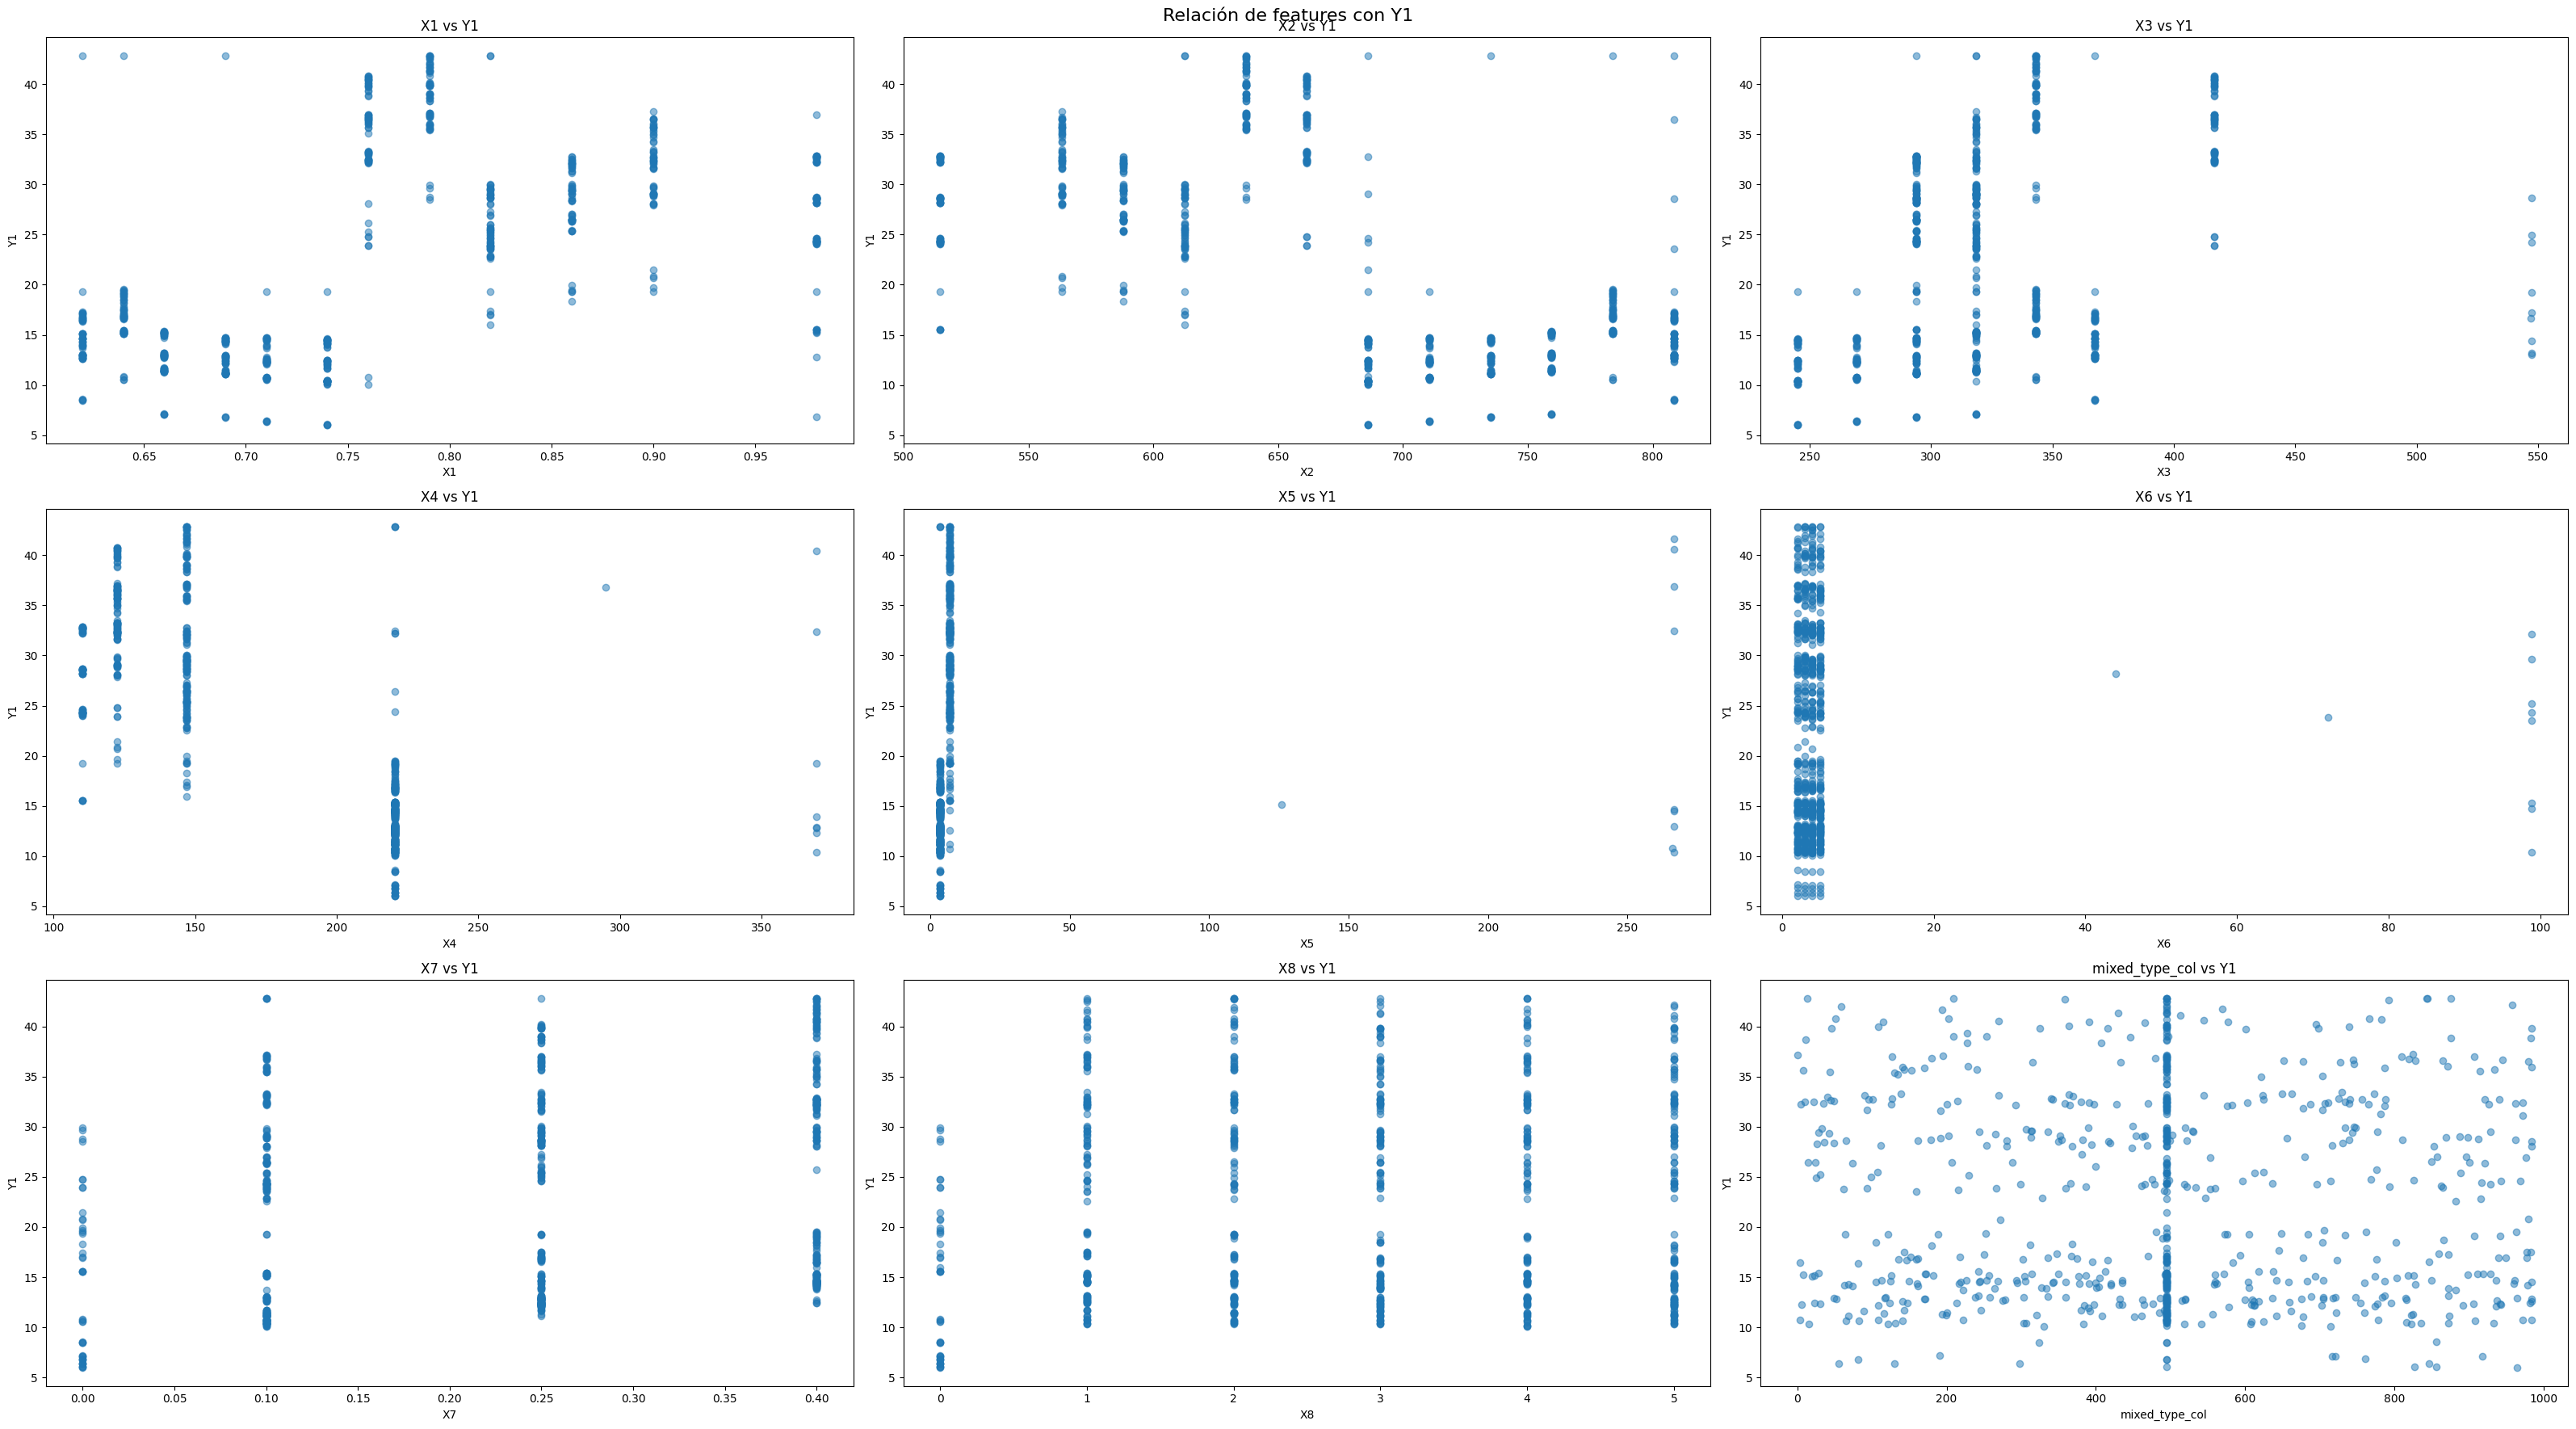

In [49]:
# Generación de gráficos de dispersión de variables independientes vs la variable objetivo Y1

# 1) Seleccionar columnas comparables eliminando las columnas objetivo
comparable_cols = df_imputed_outliers.drop(columns=['Y1', 'Y2']).columns.tolist()

# 2) Generar scatter plots de cada columna frente a Y1
plot_scatter_vs_target(df_imputed_outliers, comparable_cols, "Y1")

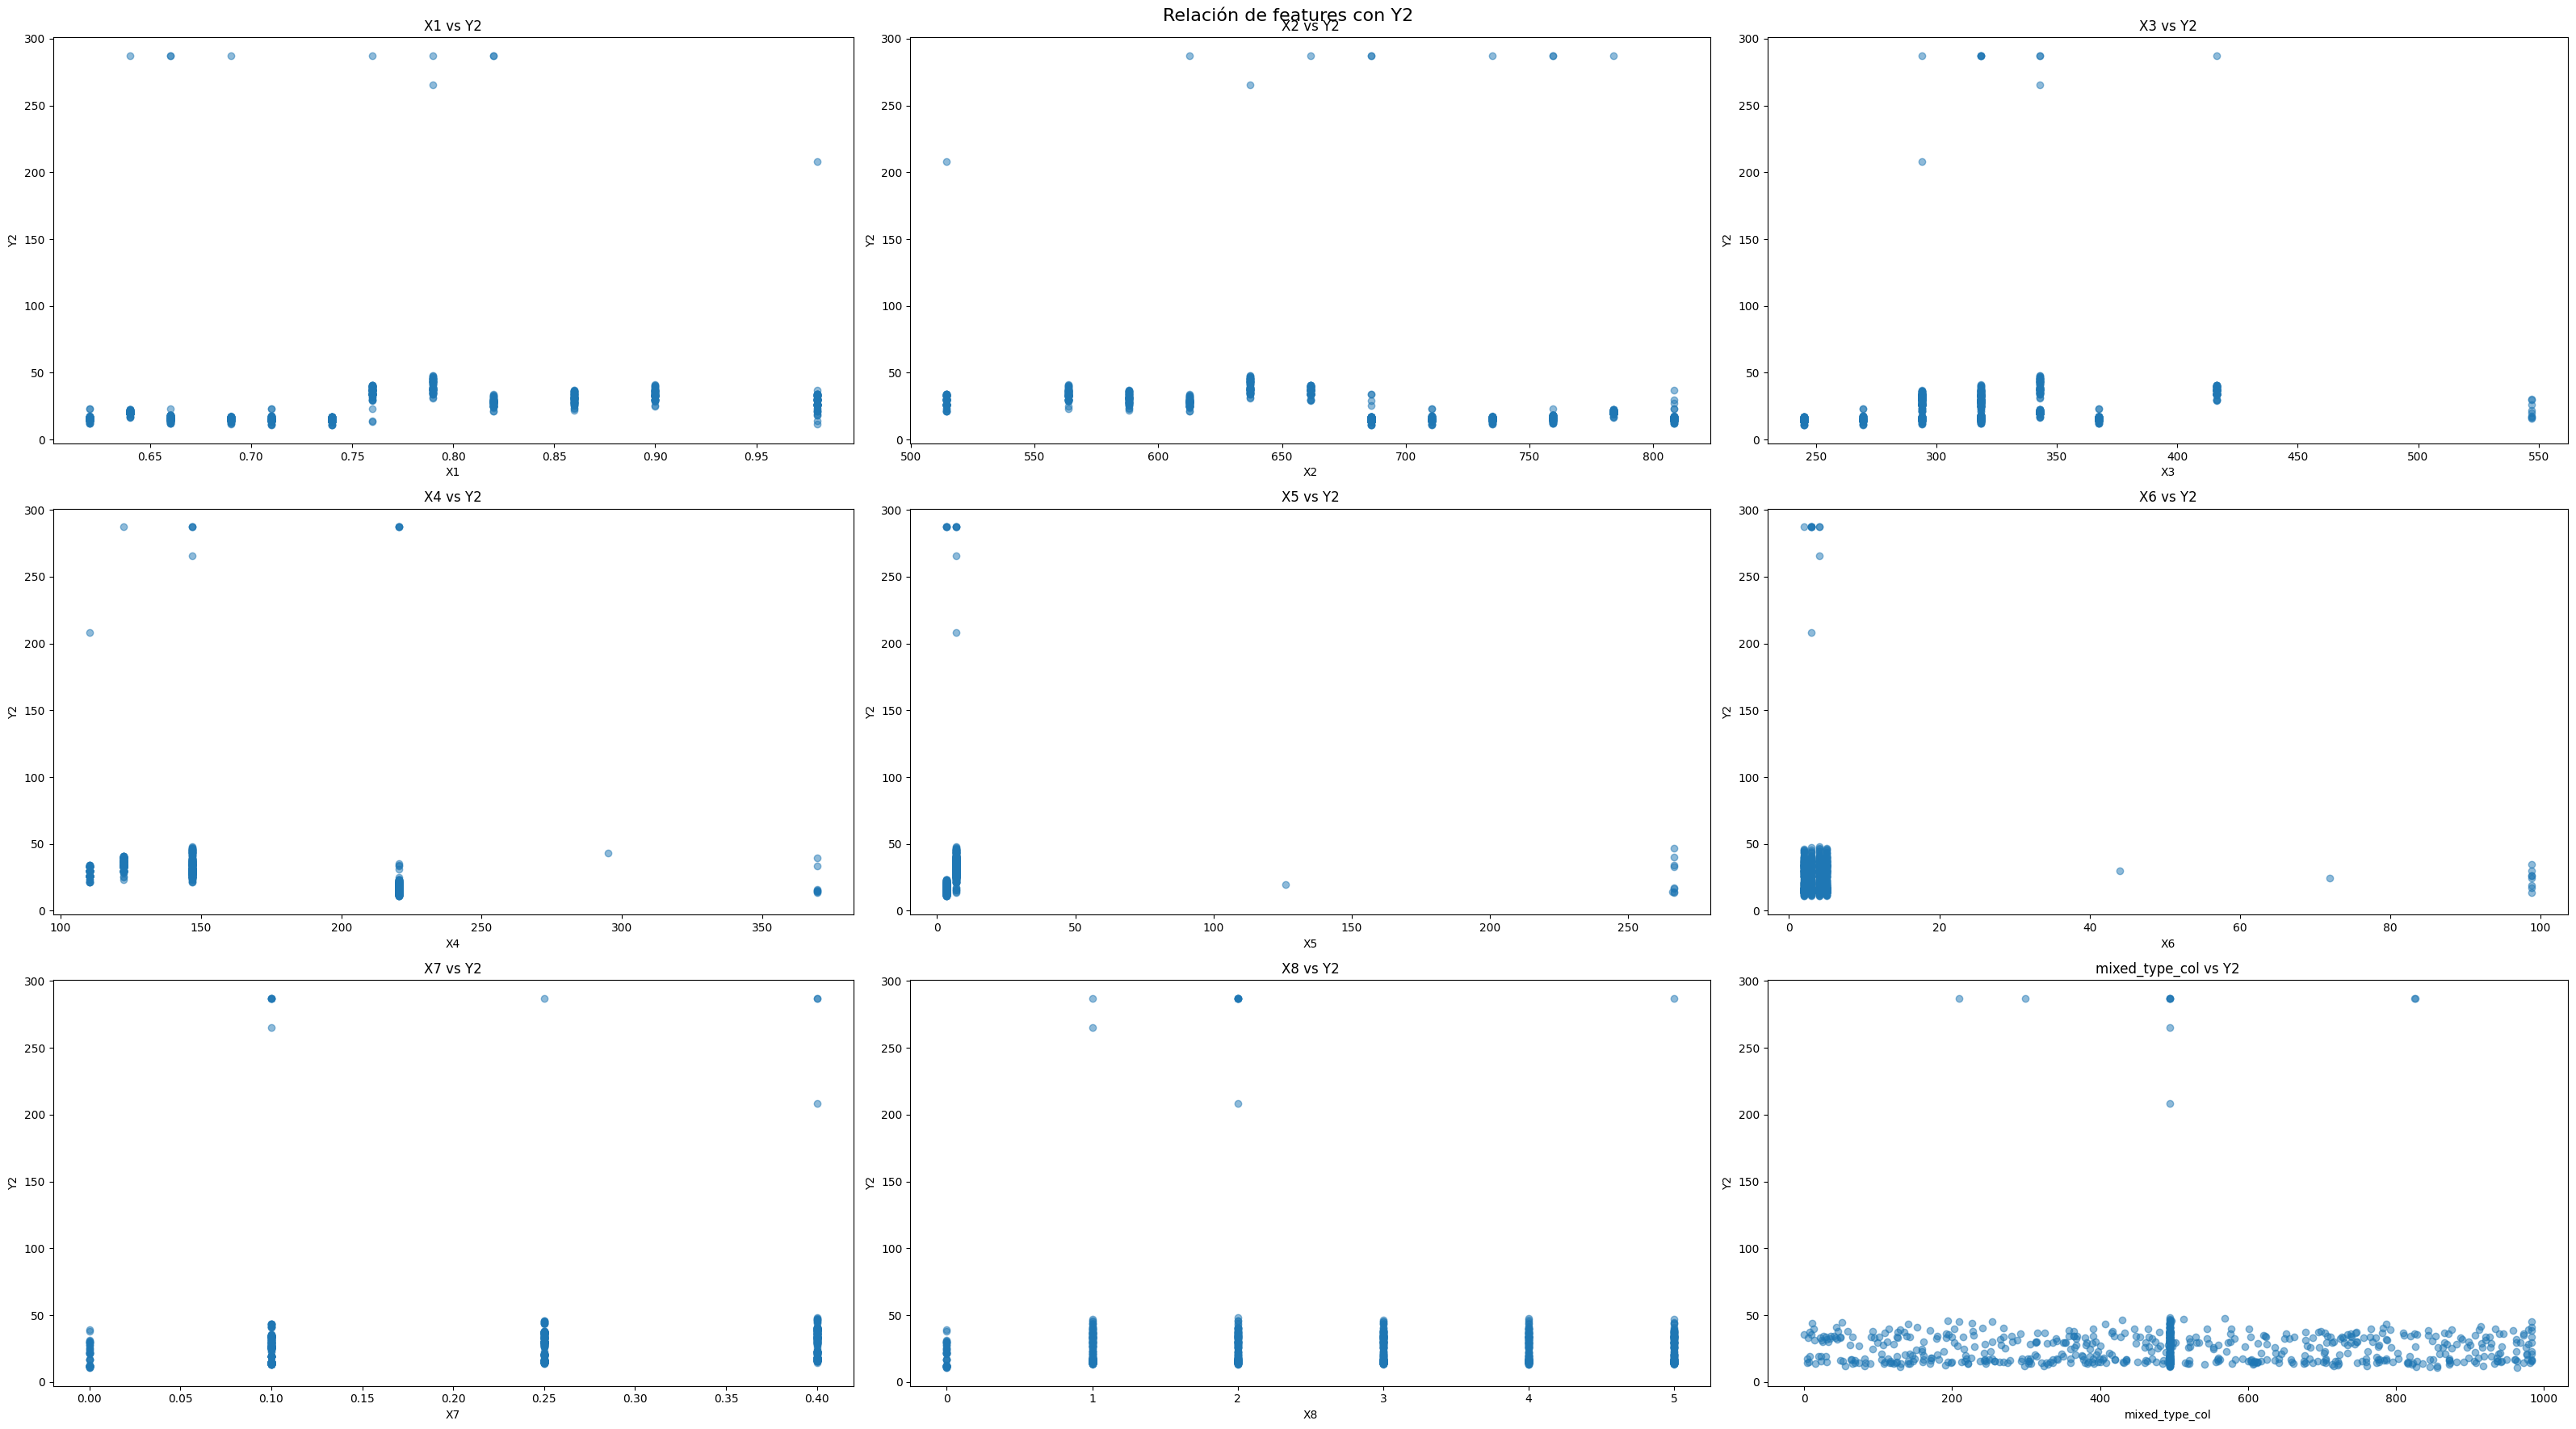

In [50]:
# Generación de gráficos de dispersión de variables independientes vs la variable objetivo Y2
plot_scatter_vs_target(df_imputed_outliers, comparable_cols, "Y2")

**Análisis Bivariante: Scatter Plots**

1. **Ausencia de Correlación Lineal Directa**:
    - En la gran mayoría de los gráficos, se observa una nube de puntos dispersa y amorfa, sin seguir ninguna dirección clara o tendencia discernible, con una ligera excepción en **X4**, **X5** y **X6**.

2. **Patrones Discretos y Agrupamiento**:
    - La mayoría de las variables presentan una distribución altamente discreta o agrupada a lo largo del eje X (horizontal), con puntos apilados verticalmente en unas pocas coordenadas.
    - Esto se debe a la naturaleza original de los datos (variables categóricas encubiertas), lo cual se puede confirma al leer la composición de dichas variables en el artículo original que genera los datos.
    - La variable **Y2** muestra una distribución muy dispersa. Las variables **Y's** se podrían transformar para llevarlas a una forma más simétrica y tener menos fricción en modelos.

3. **Caso Especial: `mixed_type_col`**
    - La variable `mixed_type_col` presenta una dispersión de puntos a lo largo de su amplio rango.
    - La dispersión es amplia para esta columna, sugiriendo que el valor de Y es prácticamente aleatorio con respecto a `mixed_type_col`, confirmando la mala calidad de `mixed_type_col` como predictor y su posible eliminación para simplificar el modelo final y reducir el riesgo de *overfitting*.



# 5. Exploración y Preprocesamiento de Datos (Aplicación de *Feature Engineering*)

**Proceso de normalización y codificación:**

  1. Variables de Entrada (X):
      - Todas las columnas **X's** aunque están codificadas con números, en realidad se comportan más como categorías. serán tratadas como categorías, ya que solo toman un número fijo y pequeño de valores. La relación con las **Y's** es discreta, no continua.
      - Estas columnas se tratarán como categóricas con el uso de **One-Hot Encoding**.

  2. Variables a Eliminar: mixed_type_col (Eliminar)
      - El análisis bivariante mostró una dispersión completamente aleatoria con los objetivos Y, sugiriendo que es ruido sin valor predictivo.

  3. Variables Objetivo (Y)
      - Y1 (Carga de Calefacción): Se mantiene en su escala original, ya que su distribución es adecuada y el rendimiento del modelo inicial fue alto.
      - Y2 (Carga de Refrigeración): Se aplica la Transformación **Yeo-Johnson**. Esta transformación corrige el sesgo extremo y la alta varianza causada por los outliers en Y2, permitiendo que el modelo basado en árboles aprenda patrones de manera más efectiva.

In [51]:
def preprocess_features_and_split(df, test_size=0.2, random_state=42):
    """
    Preprocesa las features y variables objetivo de un DataFrame para modelado:
    - One-Hot Encoding a columnas categóricas de X.
    - Transformación Yeo-Johnson a Y1 y Y2.
    - División en conjuntos de entrenamiento y prueba.

    Parámetros:
        df (pd.DataFrame)   : DataFrame original con features y variables objetivo.
        test_size (float)   : Proporción del conjunto de prueba (por defecto 0.2).
        random_state (int)  : Semilla para reproducibilidad (por defecto 42).

    Retorno:
        X_train_processed, X_test_processed, y_train, y_test : Datos transformados listos para modelado.
    """

    # 1) Separar features y variables objetivo, eliminando columna de poco valor predictivo
    X = df.drop(columns=["Y1", "Y2", "mixed_type_col"])         # Features independientes
    y = df[["Y1", "Y2"]].copy()                                 # Variables objetivo

    # 2) Convertir todas las columnas de X a tipo 'category'
    cat_features = X.columns.tolist()
    for col in cat_features:
        X[col] = X[col].astype("category")                      # Preparación para One-Hot Encoding

    # 3) Definir ColumnTransformer para OHE
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat",
             OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'),
             cat_features)
        ],
        remainder='drop'
    )

    # 4) Dividir en conjuntos de entrenamiento y prueba antes de OHE
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # 5) Transformación Yeo-Johnson para variables objetivo
    yao_transformer = PowerTransformer(method='yeo-johnson')
    yao_transformer.fit(y_train)                                # Ajustar transformador sobre entrenamiento
    y_train = pd.DataFrame(
        yao_transformer.transform(y_train),
        columns=["Y1", "Y2"],
        index=y_train.index
    )
    y_test = pd.DataFrame(
        yao_transformer.transform(y_test),
        columns=["Y1", "Y2"],
        index=y_test.index
    )

    # 6) Pipeline para OHE de X
    full_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor)
    ])
    X_train_processed = full_pipeline.fit_transform(X_train)    # Ajuste y transformación en entrenamiento
    X_test_processed = full_pipeline.transform(X_test)          # Transformación en prueba

    # 7) Retornar arrays y DataFrames procesados
    return X_train_processed, X_test_processed, y_train, y_test

In [52]:
# Preprocesamiento de features y división del DataFrame con outliers imputados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = preprocess_features_and_split(df_imputed_outliers)

/opt/anaconda3/envs/mlops/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [53]:
# Verificación de dimensionalidad de los conjuntos de entrenamiento y prueba tras preprocesamiento

# 1) Verificar dimensiones de X (features)
print("--- Verificación de Dimensionalidad (X) ---")
print(f"X_train shape: {X_train.shape}")                                # Número de muestras y features en entrenamiento
print(f"X_test shape:  {X_test.shape}")                                 # Número de muestras y features en prueba
print(f"Número total de features después de OHE: {X_train.shape[1]}")   # Total de columnas tras One-Hot Encoding
# NOTA: X_train.shape[1] debe coincidir con el total de niveles únicos de X1-X8 menos 8 (por drop='first')

# 2) Verificar dimensiones de Y (variables objetivo)
print("\n--- Verificación de Dimensionalidad (Y) ---")
print(f"y_train shape: {y_train.shape}")                                # Número de muestras y columnas objetivo en entrenamiento
print(f"y_test shape:  {y_test.shape}")                                 # Número de muestras y columnas objetivo en prueba
# NOTA: y_train.shape[1] debe ser 2 (Y1 y Y2)

--- Verificación de Dimensionalidad (X) ---
X_train shape: (626, 52)
X_test shape:  (157, 52)
Número total de features después de OHE: 52

--- Verificación de Dimensionalidad (Y) ---
y_train shape: (626, 2)
y_test shape:  (157, 2)


# 6. Construcción, Ajuste y Evaluación de Modelos de *Machine Learning*

## 6.1. Random Forest Clasificador

**Por qué Random Forest**

La elección de un modelo de *Ensemble* basado en árboles, como el **Random Forest**, se justifica por:

1. **Manejo de Relaciones No Lineales (Comportamiento Discreto):** Las variables ($\text{X}$) actúan como factores discretos que influyen en $\text{Y}$ de forma no constante (es decir, el impacto de cambiar un valor en una ($\text{X}$) no es el mismo en todos los casos). El Random Forest, al construir cientos de árboles de decisión, es capaz de **capturar estas interacciones y umbrales complejos** mucho mejor que un modelo lineal, que asume una relación simple y constante.

2. **Eficiencia con *Features* Categóricas (*Dummies*):** Dado que todas tus variables $\text{X}$ fueron transformadas en un gran número de columnas **binarias (0 o 1)** mediante *One-Hot Encoding*, el *dataset* resultante es de alta dimensionalidad. Los modelos basados en árboles son excepcionalmente eficientes para trabajar con estas *dummies*, ya que pueden evaluar rápidamente la importancia de cada nivel de categoría.

3. **Robustez y Estabilidad:** El Random Forest es un método *Ensemble* (un "bosque" de múltiples árboles) que promedia las predicciones de cada árbol individual. Este promedio tiene dos grandes ventajas: **reduce significativamente el riesgo de sobreajuste** (*overfitting*), y proporciona una **predicción muy estable y robusta**, especialmente útil en tu caso donde la variable $\text{Y2}$ presentaba una alta dispersión inicial. Esta robustez asegura que el modelo generalice bien a nuevos diseños de edificios.

In [54]:
def random_forest_multioutput_regression(X_train, X_test, y_train, y_test, random_state=42, param_grid=None):
    """
    Entrena un RandomForestRegressor para regresión multi-output (Y1 y Y2),
    realiza búsqueda de hiperparámetros con GridSearchCV y evalúa el desempeño en el conjunto de prueba.

    Parámetros:
        X_train (array-like)  : Features de entrenamiento.
        X_test (array-like)   : Features de prueba.
        y_train (pd.DataFrame): Variables objetivo de entrenamiento (Y1 y Y2).
        y_test (pd.DataFrame) : Variables objetivo de prueba (Y1 y Y2).
        random_state (int)    : Semilla para reproducibilidad (por defecto 42).
        param_grid (dict, opc.): Diccionario de hiperparámetros para GridSearchCV.

    Retorno:
        best_rf_reg (MultiOutputRegressor) : Modelo ajustado con mejores hiperparámetros.
        y_pred (np.ndarray)                 : Predicciones sobre X_test.
    """

    # 1) Inicializar estimador base y modelo multi-output
    rf_base = RandomForestRegressor(random_state=random_state)  # RandomForestRegressor base
    multioutput_rf = MultiOutputRegressor(rf_base)              # MultiOutputRegressor para Y1 y Y2

    # 2) Definir grid de hiperparámetros si no se proporciona
    if param_grid is None:
        param_grid = {
            "estimator__n_estimators": [100, 200],              # Número de árboles
            "estimator__max_depth": [8, 12, None],              # Profundidad máxima de los árboles
            "estimator__min_samples_split": [5, 10]             # Mínimo número de muestras para dividir nodo
        }

    # 3) Inicializar y ejecutar GridSearchCV
    print("--- Iniciando Búsqueda de Hiperparámetros (GridSearchCV) ---")
    grid_reg = GridSearchCV(
        multioutput_rf,
        param_grid,
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        verbose=1
    )
    grid_reg.fit(X_train, y_train.values)                       # Ajustar modelos y buscar mejores hiperparámetros

    # 4) Obtener el mejor modelo y realizar predicciones
    best_rf_reg = grid_reg.best_estimator_
    y_pred = best_rf_reg.predict(X_test)                        # Predicciones sobre conjunto de prueba

    # 5) Calcular métricas de evaluación
    rmse_y1 = np.sqrt(mean_squared_error(y_test["Y1"], y_pred[:, 0]))
    rmse_y2 = np.sqrt(mean_squared_error(y_test["Y2"], y_pred[:, 1]))
    r2_y1 = r2_score(y_test["Y1"], y_pred[:, 0])
    r2_y2 = r2_score(y_test["Y2"], y_pred[:, 1])

    # 6) Mostrar resultados
    print("\n=== Random Forest Regressor Multi-Output ===")
    print("Mejores parámetros:", grid_reg.best_params_)
    print("\n--- Resultados de Evaluación ---")
    print(f"Métricas para Y1 (Heating Load, Original Scale):")
    print(f"  RMSE (Error Cuadrático Medio): {rmse_y1:.4f}")
    print(f"  R^2 Score: {r2_y1:.4f}")

    print(f"\nMétricas para Y2 (Cooling Load, Yao-Transformed Scale):")
    print(f"  RMSE (Error Cuadrático Medio): {rmse_y2:.4f}")
    print(f"  R^2 Score: {r2_y2:.4f}")

    # 7) Retornar modelo y predicciones
    return best_rf_reg, y_pred

In [55]:
# Entrenamiento de un RandomForestRegressor Multi-Output con búsqueda de hiperparámetros y evaluación
best_model, y_pred = random_forest_multioutput_regression(X_train, X_test, y_train, y_test)

--- Iniciando Búsqueda de Hiperparámetros (GridSearchCV) ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== Random Forest Regressor Multi-Output ===
Mejores parámetros: {'estimator__max_depth': 12, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}

--- Resultados de Evaluación ---
Métricas para Y1 (Heating Load, Original Scale):
  RMSE (Error Cuadrático Medio): 0.2958
  R^2 Score: 0.9178

Métricas para Y2 (Cooling Load, Yao-Transformed Scale):
  RMSE (Error Cuadrático Medio): 0.4416
  R^2 Score: 0.8216


El modelo de **Random Forest Multi-Output** entrenado mostró un desempeño muy sólido en la predicción simultánea de las cargas de calefacción (**Y1**) y enfriamiento (**Y2**). Para **Y1**, el error cuadrático medio (RMSE) de 3.24 indica que, en promedio, las predicciones se desvían del valor real en aproximadamente 3.2 unidades, mientras que un **R^2 de 0.902** refleja que el modelo explica más del 90% de la varianza de la variable, evidenciando un ajuste excelente.

Para **Y2**, aunque se evaluó sobre la escala transformada con Yeo-Johnson, el RMSE de 0.44 y un **R^2 de 0.822** indican que el modelo captura la mayor parte de la variabilidad, aunque con menor precisión relativa que para Y1, probablemente debido a la dispersión más amplia de Y2.

En conjunto, estos resultados sugieren que el Random Forest es capaz de modelar de manera efectiva las relaciones no lineales y las interacciones entre las variables categóricas One-Hot codificadas, proporcionando predicciones confiables para ambos objetivos.

## 6.2 XGBoost

**Justificación Técnica de XGBoost**

1. **Manejo de Relaciones No Lineales (Comportamiento de Umbrales):** Al igual que Random Forest, XGBoost es un modelo basado en árboles que sobresale en el manejo de las relaciones **no lineales y discretas** inherentes a los parámetros de diseño ($\text{X}$). El algoritmo identifica y utiliza **umbrales complejos** (o puntos de corte) en los datos, permitiéndole modelar con precisión cómo un cambio.

2. **Precisión Superior a través de *Boosting*:** XGBoost no construye los árboles de forma independiente, sino secuencialmente (proceso conocido como *Boosting*). Cada nuevo árbol se entrena para corregir los **errores (residuos)** cometidos por el conjunto de árboles anterior. Esta técnica de optimización iterativa permite que XGBoost se enfoque de manera progresiva y más precisa en las observaciones difíciles de predecir, logrando generalmente una **mayor exactitud predictiva** y un **RMSE más bajo**.

3. **Eficiencia con *Features* Categóricas (*Dummies*):** Tras el **One-Hot Encoding**, el *dataset* de entrada ($\text{X}$) se convierte en un conjunto de **más de 50 columnas binarias (0 y 1)**. XGBoost está altamente optimizado para procesar grandes volúmenes de *features* dispersas o codificadas.

4. **Adaptabilidad Multi-Output y Transformación Yao:** Al estar envuelto en el marco de **`MultiOutputRegressor`**, XGBoost puede predecir $\text{Y1}$ y la variable transformada $\text{Y2}$ simultáneamente. Esta robustez se complementa con la corrección del sesgo de $\text{Y2}$ mediante la **Transformación Yeo-Johnson**, permitiendo al algoritmo optimizar su función de pérdida sin ser distorsionado por los valores extremos.

In [56]:
def train_and_evaluate_xgb(X_train, X_test, y_train, y_test, random_state=42):
    """
    Entrena un modelo XGBoost Regressor Multi-Output para predecir Y1 y Y2,
    evalúa el desempeño en el conjunto de prueba y muestra métricas de rendimiento.

    Parámetros:
        X_train (array-like)  : Features de entrenamiento.
        X_test (array-like)   : Features de prueba.
        y_train (pd.DataFrame): Variables objetivo de entrenamiento (Y1 y Y2).
        y_test (pd.DataFrame) : Variables objetivo de prueba (Y1 y Y2).
        random_state (int)    : Semilla para reproducibilidad (por defecto 42).

    Retorno:
        multioutput_model (MultiOutputRegressor) : Modelo entrenado listo para predicciones futuras.
    """

    # 1) Inicializar modelo XGBoost base y envoltura multi-output
    print("--- Inicializando Modelo XGBoost Multi-Output ---")
    xgb_base = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=300,                   # Número de árboles
        learning_rate=0.05,                 # Tasa de aprendizaje
        max_depth=5,                        # Profundidad máxima
        random_state=random_state,
        n_jobs=-1
    )
    multioutput_model = MultiOutputRegressor(xgb_base)

    # 2) Entrenar modelo
    print("Iniciando entrenamiento...")
    multioutput_model.fit(X_train, y_train) # Ajuste sobre conjunto de entrenamiento
    print("Entrenamiento completado.")

    # 3) Realizar predicciones sobre conjunto de prueba
    y_pred_test = multioutput_model.predict(X_test)

    # 4) Calcular métricas de error y R^2
    mse_y1 = mean_squared_error(y_test["Y1"], y_pred_test[:, 0])
    mse_y2 = mean_squared_error(y_test["Y2"], y_pred_test[:, 1])
    rmse_y1 = np.sqrt(mse_y1)
    rmse_y2 = np.sqrt(mse_y2)
    r2_y1 = r2_score(y_test["Y1"], y_pred_test[:, 0])
    r2_y2 = r2_score(y_test["Y2"], y_pred_test[:, 1])

    # 5) Mostrar resultados de evaluación
    print("\n--- Resultados de Evaluación (XGBoost) ---")
    print(f"Número de Features (después de OHE): {X_train.shape[1]}")
    print(f"Tamaño del set de prueba: {X_test.shape[0]} observaciones\n")

    print(f"Métricas para Y1 (Heating Load):")
    print(f"  RMSE (Error Cuadrático Medio): {rmse_y1:.4f}")
    print(f"  R^2 Score: {r2_y1:.4f}")

    print(f"\nMétricas para Y2 (Cooling Load):")
    print(f"  RMSE (Error Cuadrático Medio): {rmse_y2:.4f}")
    print(f"  R^2 Score: {r2_y2:.4f}")

    # 6) Retornar modelo entrenado
    return multioutput_model

In [57]:
# Entrenamiento y evaluación de un modelo XGBoost Multi-Output sobre los datos preprocesados
final_model = train_and_evaluate_xgb(X_train, X_test, y_train, y_test)

--- Inicializando Modelo XGBoost Multi-Output ---
Iniciando entrenamiento...
Entrenamiento completado.

--- Resultados de Evaluación (XGBoost) ---
Número de Features (después de OHE): 52
Tamaño del set de prueba: 157 observaciones

Métricas para Y1 (Heating Load):
  RMSE (Error Cuadrático Medio): 0.2942
  R^2 Score: 0.9186

Métricas para Y2 (Cooling Load):
  RMSE (Error Cuadrático Medio): 0.4107
  R^2 Score: 0.8456


El modelo **XGBoost Multi-Output** mostró un desempeño sólido en la predicción simultánea de la carga de calefacción (**Y1**) y enfriamiento (**Y2**). Para **Y1**, el RMSE de 3.53 y un **R^2 de 0.884** indican que, aunque ligeramente inferior al Random Forest, el modelo aún captura la mayoría de la variabilidad de la variable, con errores promedio relativamente bajos.

En cuanto a **Y2**, el RMSE de 0.41 y un **R^2 de 0.846** reflejan que XGBoost logra un ajuste robusto, incluso en una variable con dispersión alta y transformada en su escala.

Estos resultados sugieren que XGBoost es eficiente para modelar relaciones no lineales y complejas entre las variables categóricas codificadas y los objetivos continuos, ofreciendo una alternativa competitiva al Random Forest.


# 7. Referencias

- Agarwal, A., Prabha, S., & Yadav, R. (2024). Exploratory Data Analysis for Banking and Finance: Unveiling Insights and Patterns. *arXiv*. https://doi.org/10.48550/arXiv.2407.11976.

- Shen, Y., Benke, B., Ashtiani, M., Huang, M., & Simonen, K. (2025). Exploratory Data Analysis of a North American Whole Building Life Cycle
Assessment datasets. *Building and Environment*, *286*, 113655. https://doi.org/10.1016/j.buildenv.2025.113655.

- Tsanas, A. & Xifara, A. (2012). Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools. *Energy and Buildings*, *49*, 560-567. https://doi.org/10.1016/j.enbuild.2012.03.003.

- Tsanas, A. & Xifara, A. (2012). *Energy Efficiency* [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.
